# Evaluating Whether There is Support to Claim that Climate Change Impacts Food Company Stock 
**BUAN 6590: Capstone Project Final Report <br/>
Dolan School of Business <br/>
Fairfield University <br/>
Megan Kuscsik**


## Project Outline

I am representing a small food company, Comfort Foods, who deals directly with farmers to create their products. They have noticed in recent years that farmers charge more for products when the growing season is poor. The committee of investors for Comfort Foods is concerned that climate change is influencing growing seasons and will eventually impact company performance. **The purpose of this project is to determine if a case can be made to support that climate change in some way impacts the stock market for food companies, either directly or indirectly.** This investigation will focus on learning objectives from BA 505: Python and BA500: Business Analytics. The results of this analysis will determine if the Comfort Foods needs to take measures to prepare for future commodity shortages and price increases.  

The following questions will be answered in this investigation: 
1. What relationship (if any) exists between climate factors and commodity stocks? 
2. What relationship (if any) exists between climate factors and company stocks? 
3. What relationship (if any) exists between commodity stocks and company stocks? 
4. Does any volatility present in the data exhibit a relationship with Temp_Anamoly?
5. What changes have companies made to their product lines to address increased costs? 



## Data Source
My dataset was compiled from climate data, from the [National Centers for Environmental Information (NOAA)]( https://www.ncdc.noaa.gov/cag/national/time-series/110/pcp/all/3/2010-2019?base_prd=true&begbaseyear=1901&endbaseyear=2000), [NASA](https://data.giss.nasa.gov/gistemp/), with stock data from Yahoo Finance. 

## Data Dictionary

| Column Name  | Description |
| ------------- | ------------- |
| **Date** | Date (mm/dd/yyyy) of data collection |
| **Month** | Month of data collection | 
| **Temp_Anamoly** | Temperature Anomalies: difference from the mean temperature of that time period | 
| **Avg_Temp_F** | Average daily temperature in (degrees F) | 
| **Avg_Precip_In** | Average daily precipitation (inches) | 
| **CORN_Open** | Price of CORN stock at the beginning of the trading day | 
| **CORN_High** | Highest price of CORN stock on respective trading day | 
| **CORN_Low** | Lowest price of CORN stock on respective trading day | 
| **CORN_Close** | Price of CORN stock at closing time | 
| **CORN_Volume** | Number of CORN stocks traded on respective day| 
| **WEAT_Open** | Price of WEAT stock at the beginning of the trading day | 
| **WEAT_High** | Highest price of WEAT stock on respective trading day | 
| **WEAT_Low** | Lowest price of WEAT stock on respective trading day | 
| **WEAT_Close** | Price of WEAT stock at closing time | 
| **WEAT_Volume** | Number of WEAT stocks traded on respective day | 
| **CANE_Open** | Price of CANE stock at the beginning of the trading day | 
| **CANE_High** | Highest price of CANE stock on respective trading day | 
| **CANE_Low** | Lowest price of CANE stock on respective trading day | 
| **CANE_Close** | Price of CANE stock at closing time | 
| **CANE_Volume** | Number of CANE stocks traded on respective day | 
| **HSY_Open** | Price of The Hershey Company stock at the beginning of the trading day | 
| **HSY_High** | Highest price of The Hershey Company stock on respective trading day | 
| **HSY_Low** | Lowest price of The Hershey Company stock on respective trading day | 
| **HSY_Close** | Price of The Hershey Company stock at closing time | 
| **HSY_Volume** | Number of The Hershey Company stocks traded on respective day | 
| **SJM_Open** | Price of The J.M. Smucker Company stock at the beginning of the trading day | 
| **SJM_High** | Highest price of The J.M. Smucker Company stock on respective trading day | 
| **SJM_Low** | Lowest price of The J.M. Smucker Company stock on respective trading day | 
| **SJM_Close** | Price of The J.M. Smucker Company stock at closing time | 
| **SJM_Volume** | Number of The J.M. Smucker Company stocks traded on respective day | 
| **GIS_Open** | Price of General Mills stock at the beginning of the trading day | 
| **GIS_High** | Highest price of General Mills stock on respective trading day | 
| **GIS_Low** | Lowest price of General Mills stock on respective trading day | 
| **GIS_Close** | Price of General Mills stock at closing time | 
| **GIS_Volume** | Number of General Mills stocks traded on respective day | 
| **PEP_Open** | Price of PepsiCo stock at the beginning of the trading day | 
| **PEP_High** | Highest price of PepsiCo stock on respective trading day | 
| **PEP_Low** | Lowest price of PepsiCo stock on respective trading day | 
| **PEP_Close** | Price of PepsiCo stock at closing time | 
| **PEP_Volume** | Number of PepsiCo stocks traded on respective day | 
| **CPB_Open** | Price of Campbell Soup Company stock at the beginning of the trading day | 
| **CPB_High** | Highest price of Campbell Soup Company stock on respective trading day | 
| **CPB_Low** | Lowest price of Campbell Soup Company stock on respective trading day | 
| **CPB_Close** | Price of Campbell Soup Company stock at closing time | 
| **CPB_Volume** | Number of Campbell Soup Company stocks traded on respective day | 


**For reference** <br/>
- CORN, WEAT, and CANE stocks: will be referred to as commodity stock <br/>
- HSY, SJM, GIS, PEP, CPB stocks: will be referred to as company stocks


In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

#Removing the commas from "volume" feaures
data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']]  = data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']].replace(',', '', regex=True)

#change objects to float
data['CORN_Volume'] = data.CORN_Volume.astype(float)
data['WEAT_Volume'] = data.WEAT_Volume.astype(float)
data['CANE_Volume'] = data.CANE_Volume.astype(float)
data['HSY_Volume'] = data.HSY_Volume.astype(float)
data['SJM_Volume'] = data.SJM_Volume.astype(float)
data['GIS_Volume'] = data.GIS_Volume.astype(float)
data['PEP_Volume'] = data.PEP_Volume.astype(float)
data['CPB_Volume'] = data.CPB_Volume.astype(float)

In [3]:
#resample data monthly
data_month = data.resample('1M').mean()

### Please Note: All features denoted with a '-S' at the end of the feature name represent data that was altered to be more stationary. In the final report, the '-S' is not referred to, however, it was needed in the Python language.

## Augmented Dickey-Fuller test

**Stationary** <br/>
- daily was converted as close to stationary as possible <br/>
**Daily/Monthly**
- Temp_Anamoly/ same
- CORN_Close / same
- WEAT_Close_S / WEAT_Close
- CANE_Close/ same
- HSY_Close_S/ same
- SJM_Close/ same
- GIS_Close / GIS_Close_S
- PEP_Close_S /same
- CPB_Close_S / same

In [4]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
series = data['Temp_Anamoly'] #reject null
result = adfuller(series, autolag='AIC')
print('Daily ADF') 
print("Temp_Anamoly")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

print('Monthly ADF')    
series = data_month['Temp_Anamoly'] #reject null
result = adfuller(series, autolag='AIC')
print("Temp_Anamoly")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

Daily ADF
Temp_Anamoly
ADF Statistic: -3.349684661478984
n_lags: 0.012798478096564763
p-value: 0.012798478096564763
Critial Values:
   1%, -3.433605925774539
Critial Values:
   5%, -2.862978297026843
Critial Values:
   10%, -2.5675356871295394
Monthly ADF
Temp_Anamoly
ADF Statistic: -3.5326006597414037
n_lags: 0.007188266449007789
p-value: 0.007188266449007789
Critial Values:
   1%, -3.5011373281819504
Critial Values:
   5%, -2.8924800524857854
Critial Values:
   10%, -2.5832749307479226


In [5]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
print('Daily ADF') 
series2 = data['CORN_Close'] #reject null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

print('Monthly ADF')    
series = data_month['CORN_Close'] #reject null
result = adfuller(series, autolag='AIC')
print("Temp_Anamoly")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

Daily ADF
ADF Statistic: -3.5326006597414037
n_lags: 0.007188266449007789
p-value: 0.007188266449007789
Critial Values:
   1%, -3.5011373281819504
Critial Values:
   5%, -2.8924800524857854
Critial Values:
   10%, -2.5832749307479226
Monthly ADF
Temp_Anamoly
ADF Statistic: -4.743433365344349
n_lags: 6.968672091938773e-05
p-value: 6.968672091938773e-05
Critial Values:
   1%, -3.5117123057187376
Critial Values:
   5%, -2.8970475206326833
Critial Values:
   10%, -2.5857126912469153


In [6]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
print('Daily Original ADF')
series = data['WEAT_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  
    
#make data stationary
#https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
data['WEAT_rolling'] = data['WEAT_Close'].rolling(window = 20).mean()
data['WEAT_Close_S'] = data['WEAT_Close'] - data['WEAT_rolling']
data['WEAT_Close_S'].fillna(method='bfill', inplace = True)

print('Diaily  ADF after')
series = data['WEAT_Close_S'] #reject null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

print('Monthly ADF')    
series = data_month['WEAT_Close'] #reject null
result = adfuller(series, autolag='AIC')
print("Temp_Anamoly")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

Daily Original ADF
ADF Statistic: -1.6832583240977579
n_lags: 0.4397582773823659
p-value: 0.4397582773823659
Critial Values:
   1%, -3.4336419856688276
Critial Values:
   5%, -2.862994217611322
Critial Values:
   10%, -2.567544164035933
Diaily  ADF after
ADF Statistic: -6.959257032783666
n_lags: 9.255281609715785e-10
p-value: 9.255281609715785e-10
Critial Values:
   1%, -3.4336419856688276
Critial Values:
   5%, -2.862994217611322
Critial Values:
   10%, -2.567544164035933
Monthly ADF
Temp_Anamoly
ADF Statistic: -3.287866356160314
n_lags: 0.015429637731767172
p-value: 0.015429637731767172
Critial Values:
   1%, -3.506057133647011
Critial Values:
   5%, -2.8946066061911946
Critial Values:
   10%, -2.5844100201994697


In [7]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
print('Daily ADF')
series = data['CANE_Close'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


print('Monthly ADF')    
series = data_month['CANE_Close'] #reject null- data wil not get more stationary
result = adfuller(series, autolag='AIC')
print("Temp_Anamoly")
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  


Daily ADF
ADF Statistic: -2.3244760801560362
n_lags: 0.16419540869118493
p-value: 0.16419540869118493
Critial Values:
   1%, -3.4336140516629836
Critial Values:
   5%, -2.8629818846551376
Critial Values:
   10%, -2.5675375973574788
Monthly ADF
Temp_Anamoly
ADF Statistic: -2.7044483369491332
n_lags: 0.07327167061227646
p-value: 0.07327167061227646
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781


In [8]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
print('Original ADF')
series = data['HSY_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

#make more stationary
data['HSY_Close_S']= 1/(np.log(data['HSY_Close']))
#make data stationary
#https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
#data['HSY_rolling'] = data['HSY_Close'].rolling(window = 20).mean()
#data['HSY_Close_S'] = data['HSY_Close'] - WEAT_rolling
#data['HSY_Close_S'].fillna(method='bfill', inplace = True)

print('Daily ADF after')
series = data['HSY_Close_S'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

print('Monthly ADF')
series = data_month['HSY_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  
    
#make data stationary
#https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
#data_month['HSY_rolling'] = data_month['HSY_Close'].rolling(window = 20).mean()
#data_month['HSY_Close_S'] = data_month['HSY_Close'] - WEAT_rolling
#data_month['HSY_Close_S'].fillna(method='bfill', inplace = True)

data_month['HSY_Close_S']= np.log(data_month['HSY_Close'])

print('Monthly ADF after')
series = data_month['HSY_Close_S'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

Original ADF
ADF Statistic: -0.7272342802619214
n_lags: 0.8395685786869467
p-value: 0.8395685786869467
Critial Values:
   1%, -3.433610796445261
Critial Values:
   5%, -2.8629804474582348
Critial Values:
   10%, -2.5675368321236967
Daily ADF after
ADF Statistic: -1.7584727125525
n_lags: 0.40126488103792907
p-value: 0.40126488103792907
Critial Values:
   1%, -3.4336124232421144
Critial Values:
   5%, -2.8629811656983755
Critial Values:
   10%, -2.5675372145497732
Monthly ADF
ADF Statistic: -1.0672561645741974
n_lags: 0.7279516215169859
p-value: 0.7279516215169859
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781
Monthly ADF after
ADF Statistic: -1.7148043613295292
n_lags: 0.4235014187212751
p-value: 0.4235014187212751
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781


In [9]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
print('Original ADF')
series = data['SJM_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

print('Monthly ADF')
series = data_month['SJM_Close'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

#make data stationary
#https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
#data_month['HSY_rolling'] = data_month['HSY_Close'].rolling(window = 20).mean()
#data_month['HSY_Close_S'] = data_month['HSY_Close'] - WEAT_rolling
#data_month['HSY_Close_S'].fillna(method='bfill', inplace = True)

data_month['SJM_Close_S']= np.log(data_month['SJM_Close'])

print('Monthly ADF')
series = data_month['SJM_Close_S'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

Original ADF
ADF Statistic: -2.3536510481869977
n_lags: 0.15524744875229252
p-value: 0.15524744875229252
Critial Values:
   1%, -3.433605925774539
Critial Values:
   5%, -2.862978297026843
Critial Values:
   10%, -2.5675356871295394
Monthly ADF
ADF Statistic: -2.5612433011618734
n_lags: 0.1012749343533429
p-value: 0.1012749343533429
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781
Monthly ADF
ADF Statistic: -2.6130778581963057
n_lags: 0.0903243519020882
p-value: 0.0903243519020882
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781


In [10]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
print('Daily ADF')
series = data['GIS_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

print('Monthly ADF')
series = data_month['GIS_Close'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 
    
#make data stationary
#https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0
#data_month['GIS_rolling'] = data_month['GIS_Close'].rolling(window = 20).mean()
#data_month['GIS_Close_S'] = data_month['GIS_Close'] - WEAT_rolling
#data_month['GIS_Close_S'].fillna(method='bfill', inplace = True)

data_month['GIS_Close_S']= 1/(np.log(data_month['GIS_Close']))

print('Monthly ADF after')
series = data_month['GIS_Close_S'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

Daily ADF
ADF Statistic: -2.0071287732498235
n_lags: 0.2834561547830102
p-value: 0.2834561547830102
Critial Values:
   1%, -3.433605925774539
Critial Values:
   5%, -2.862978297026843
Critial Values:
   10%, -2.5675356871295394
Monthly ADF
ADF Statistic: -2.044168273459457
n_lags: 0.2675487246215547
p-value: 0.2675487246215547
Critial Values:
   1%, -3.502704609582561
Critial Values:
   5%, -2.8931578098779522
Critial Values:
   10%, -2.583636712914788
Monthly ADF after
ADF Statistic: -2.3414060247102335
n_lags: 0.1589611205755277
p-value: 0.1589611205755277
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781


In [11]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
series = data['PEP_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
#make more stationary
data['PEP_Close_S']= 1/(np.log(data['PEP_Close']))

print('Best ADF')
series = data['PEP_Close_S'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  
    
print('Monthly ADF ')
series = data_month['PEP_Close'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 
    
#make more stationary
data_month['PEP_Close_S']= 1/(np.log(data_month['PEP_Close']))

print('Monthly ADF after ')
series = data_month['PEP_Close_S'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -0.6949584286941367
n_lags: 0.8480511001073777
p-value: 0.8480511001073777
Critial Values:
   1%, -3.4336091712699957
Critial Values:
   5%, -2.862979729933645
Critial Values:
   10%, -2.567536450078678
Best ADF
ADF Statistic: -1.3250198410784726
n_lags: 0.6176494037960999
p-value: 0.6176494037960999
Critial Values:
   1%, -3.433605925774539
Critial Values:
   5%, -2.862978297026843
Critial Values:
   10%, -2.5675356871295394
Monthly ADF 
ADF Statistic: -0.42898708329198065
n_lags: 0.9051453162366216
p-value: 0.9051453162366216
Critial Values:
   1%, -3.5011373281819504
Critial Values:
   5%, -2.8924800524857854
Critial Values:
   10%, -2.5832749307479226
Monthly ADF after 
ADF Statistic: -1.2831520558531224
n_lags: 0.6368445898201689
p-value: 0.6368445898201689
Critial Values:
   1%, -3.5011373281819504
Critial Values:
   5%, -2.8924800524857854
Critial Values:
   10%, -2.5832749307479226


In [12]:
#ADF test 
#p-value< 0.05 reject null
#null hypothesis: series is non-stationary
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
series = data['CPB_Close'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  
    
#make more stationary
data['CPB_Close_S']= np.log(data['CPB_Close'])

print('Best ADF')
series = data['CPB_Close_S'] #accept null
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  
    
print('Monthly ADF ')
series = data_month['CPB_Close'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 
    
#make more stationary
data_month['CPB_Close_S']= 1/(np.log(data_month['CPB_Close']))

print('Monthly ADF ')
series = data_month['CPB_Close_S'] #reject null- data will not get more stationary
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -1.9263748008275647
n_lags: 0.31975708802939373
p-value: 0.31975708802939373
Critial Values:
   1%, -3.433605925774539
Critial Values:
   5%, -2.862978297026843
Critial Values:
   10%, -2.5675356871295394
Best ADF
ADF Statistic: -2.029795452905643
n_lags: 0.27366353572776775
p-value: 0.27366353572776775
Critial Values:
   1%, -3.433605925774539
Critial Values:
   5%, -2.862978297026843
Critial Values:
   10%, -2.5675356871295394
Monthly ADF 
ADF Statistic: -1.9660792099987443
n_lags: 0.3016412986854501
p-value: 0.3016412986854501
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781
Monthly ADF 
ADF Statistic: -2.113674644609212
n_lags: 0.2390516285312183
p-value: 0.2390516285312183
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781


# Research Questions 1-2
**1. What relationship (if any) exists between climate factors and commodity stocks?** <br/>
**2. What relationship (if any) exists between climate factors and company stocks?** <br/>


### Stock_Close

Text(0.5,1,'Correlation Heatmap: Monthly Stationary Stock_Close v Temp_Anamoly')

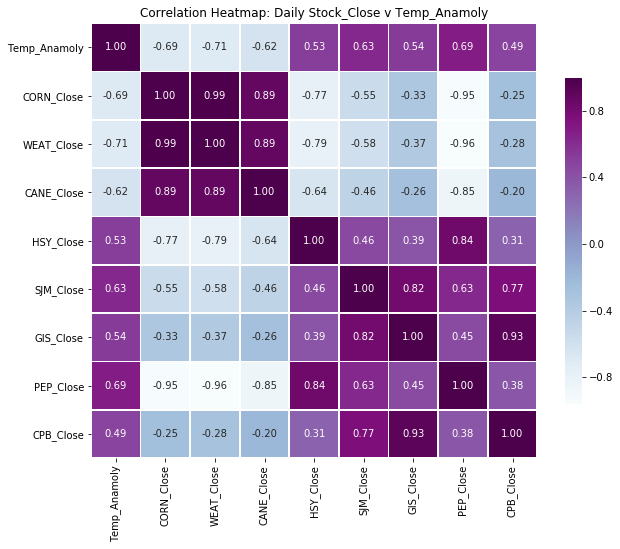

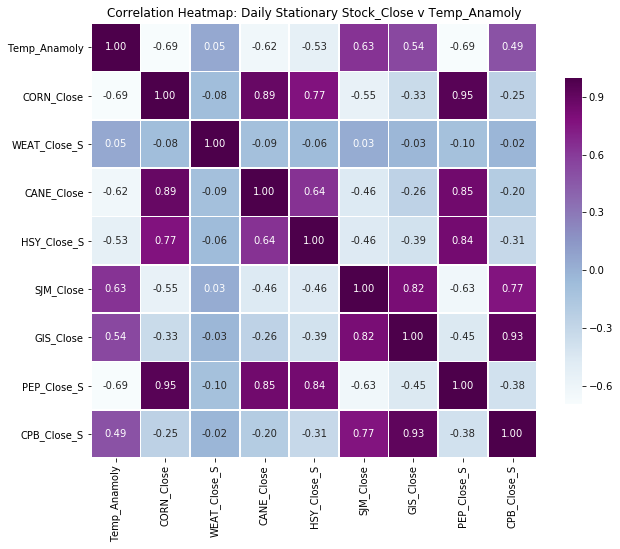

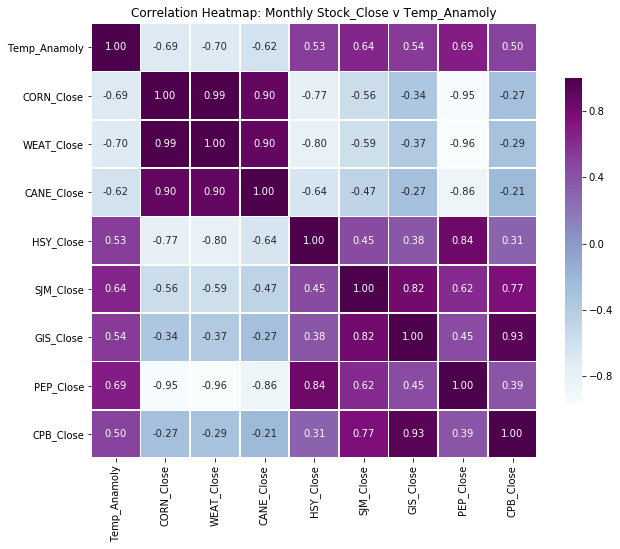

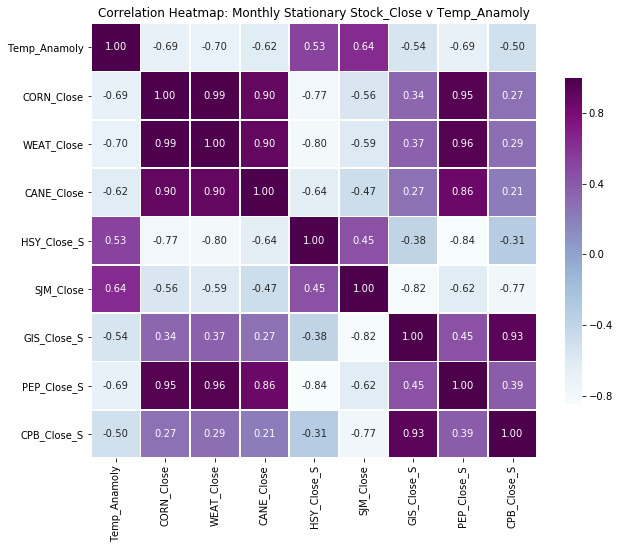

In [13]:
#correlation between daily stock_Close and Temp_Anamoly

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Close v Temp_Anamoly')

stock_per_change = data[['Temp_Anamoly','CORN_Close','WEAT_Close_S','CANE_Close','HSY_Close_S','SJM_Close','GIS_Close','PEP_Close_S','CPB_Close_S']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stationary Stock_Close v Temp_Anamoly')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stock_Close v Temp_Anamoly')

stock_per_change = data_month[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close_S','SJM_Close','GIS_Close_S','PEP_Close_S','CPB_Close_S']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stationary Stock_Close v Temp_Anamoly')

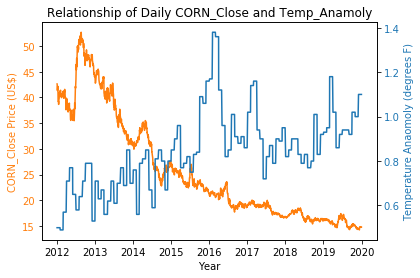

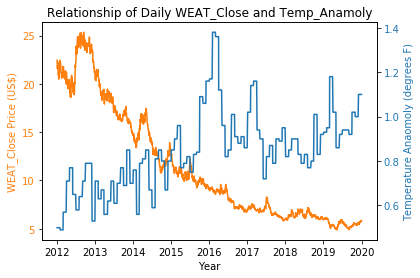

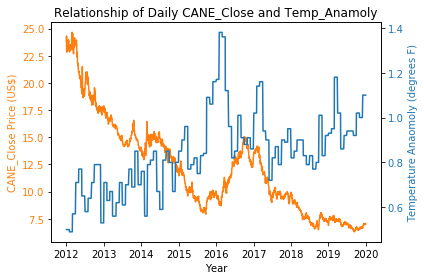

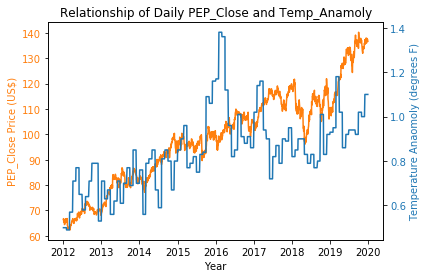

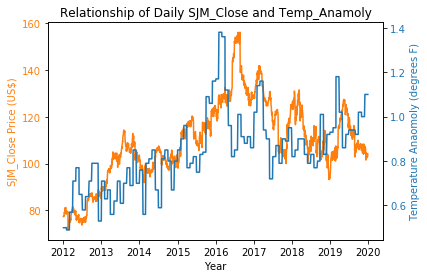

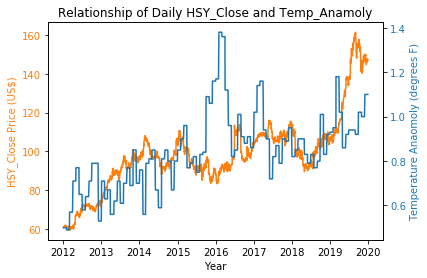

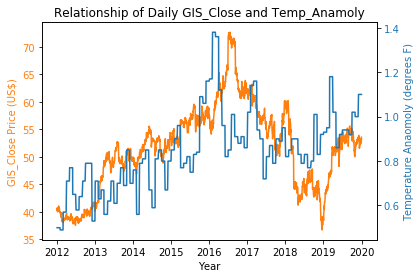

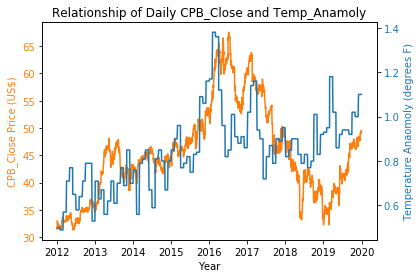

In [14]:
#plotting daily temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CORN_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_Close Price (US$)', color=color)
ax1.plot(data['CORN_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily WEAT_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_Close Price (US$)', color=color)
ax1.plot(data['WEAT_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CANE_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_Close Price (US$)', color=color)
ax1.plot(data['CANE_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily PEP_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_Close Price (US$)', color=color)
ax1.plot(data['PEP_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily SJM_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_Close Price (US$)', color=color)
ax1.plot(data['SJM_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily HSY_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_Close Price (US$)', color=color)
ax1.plot(data['HSY_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily GIS_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_Close Price (US$)', color=color)
ax1.plot(data['GIS_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CPB_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_Close Price (US$)', color=color)
ax1.plot(data['CPB_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

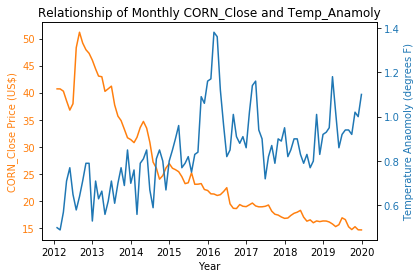

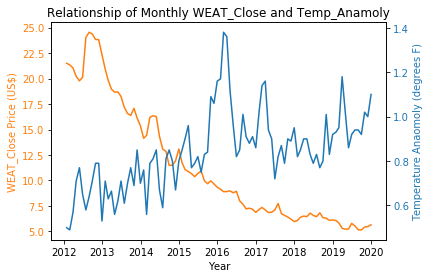

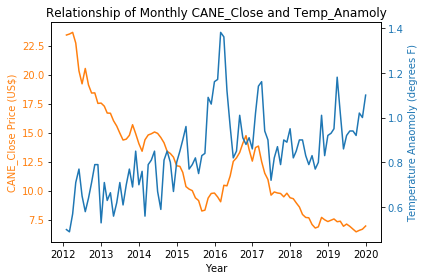

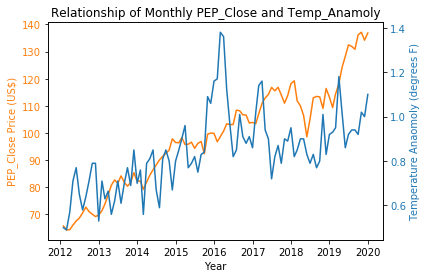

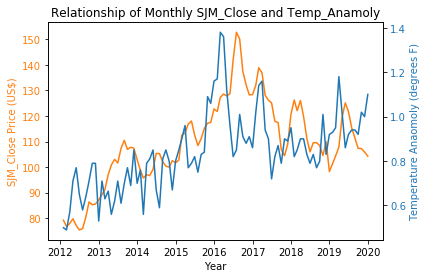

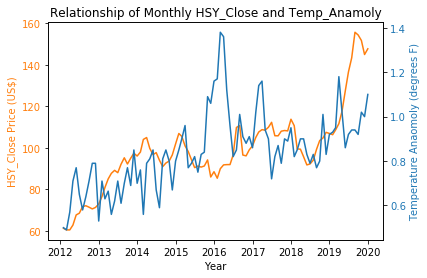

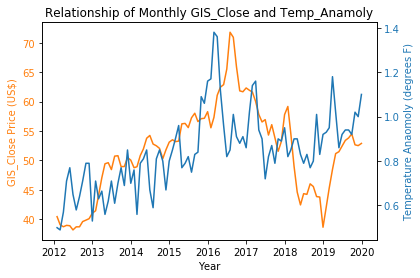

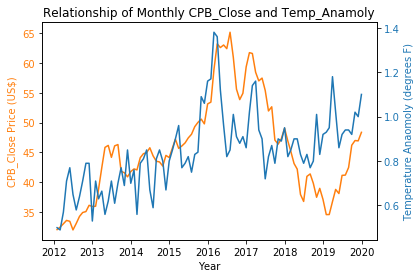

In [15]:
#plotting monthly temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CORN_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_Close Price (US$)', color=color)
ax1.plot(data_month['CORN_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly WEAT_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_Close Price (US$)', color=color)
ax1.plot(data_month['WEAT_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CANE_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_Close Price (US$)', color=color)
ax1.plot(data_month['CANE_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_Close Price (US$)', color=color)
ax1.plot(data_month['PEP_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly SJM_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_Close Price (US$)', color=color)
ax1.plot(data_month['SJM_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly HSY_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_Close Price (US$)', color=color)
ax1.plot(data_month['HSY_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly GIS_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_Close Price (US$)', color=color)
ax1.plot(data_month['GIS_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CPB_Close and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_Close Price (US$)', color=color)
ax1.plot(data_month['CPB_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

## Calculations from Stock_Close features

### Profit
- profit = (Stock_Close x Volume)

In [16]:
#calculate daily profit for each stock 
data['CORN_profit'] = data['CORN_Close'] * data['CORN_Volume']
data['WEAT_profit'] = data['WEAT_Close_S'] * data['WEAT_Volume']
data['CANE_profit'] = data['CANE_Close'] * data['CANE_Volume']
data['HSY_profit'] = data['HSY_Close_S'] * data['HSY_Volume']
data['SJM_profit'] = data['SJM_Close'] * data['SJM_Volume']
data['GIS_profit'] = data['GIS_Close'] * data['GIS_Volume']
data['PEP_profit'] = data['PEP_Close_S'] * data['PEP_Volume']
data['CPB_profit'] = data['CPB_Close_S'] * data['CPB_Volume']

#calculate monthly profit for each stock 
data_month['CORN_profit'] = data_month['CORN_Close'] * data_month['CORN_Volume']
data_month['WEAT_profit'] = data_month['WEAT_Close'] * data_month['WEAT_Volume']
data_month['CANE_profit'] = data_month['CANE_Close'] * data_month['CANE_Volume']
data_month['HSY_profit'] = data_month['HSY_Close_S'] * data_month['HSY_Volume']
data_month['SJM_profit'] = data_month['SJM_Close'] * data_month['SJM_Volume']
data_month['GIS_profit'] = data_month['GIS_Close_S'] * data_month['GIS_Volume']
data_month['PEP_profit'] = data_month['PEP_Close_S'] * data_month['PEP_Volume']
data_month['CPB_profit'] = data_month['CPB_Close_S'] * data_month['CPB_Volume']

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Profit v Temp_Anamoly')

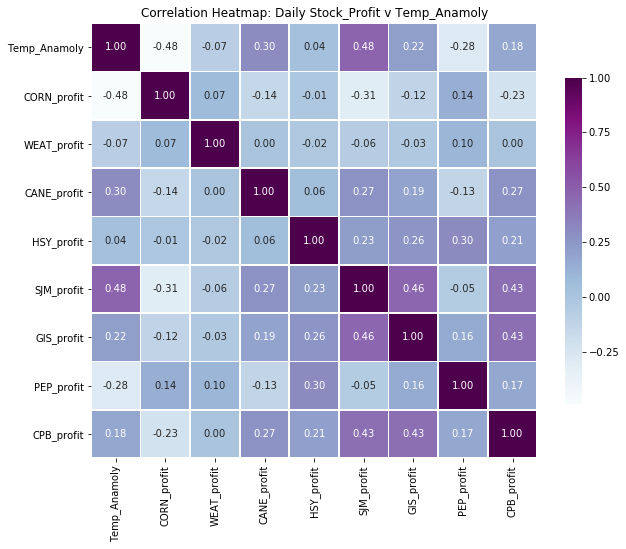

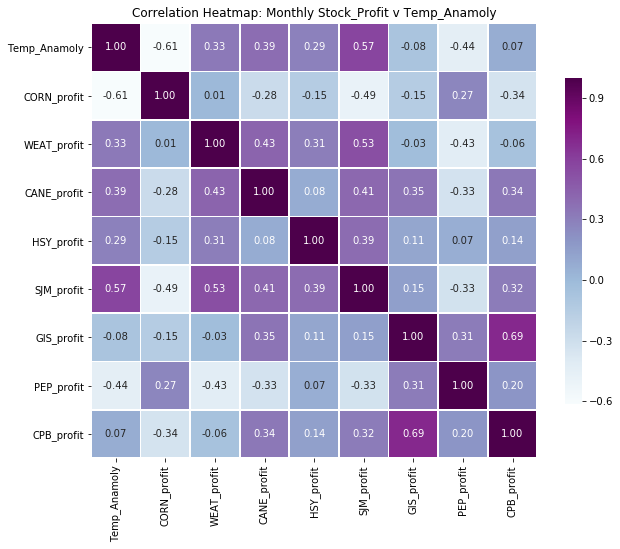

In [17]:
#correlation between daily profit and Temp_Anamoly

##low correlation between daily profit and Temp_Anamoly
stock_per_change = data[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Profit v Temp_Anamoly')

#correlation between monthly profit and Temp_Anamoly

#low correlation between Temp_Anamoly and Daily profit for WEAT, CANE, GIS, PEP, CPB
#moderate correlation between Temp_Anamoly and Daily profit for CORN, HSY, SJM, 
stock_per_change = data_month[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stock_Profit v Temp_Anamoly')

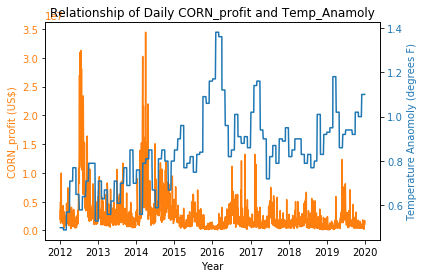

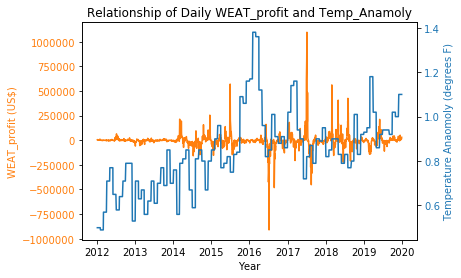

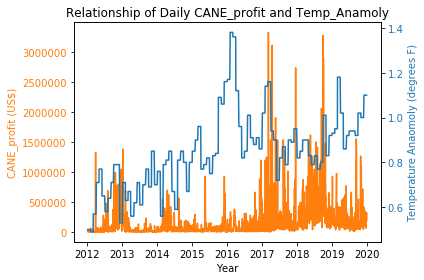

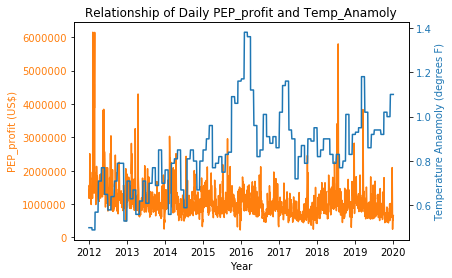

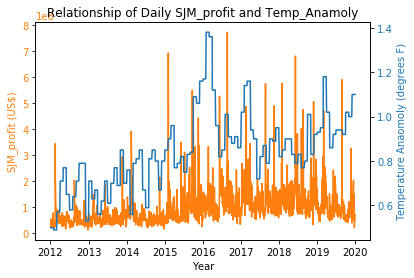

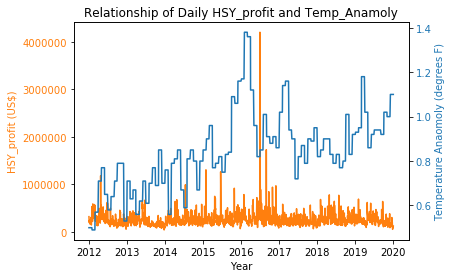

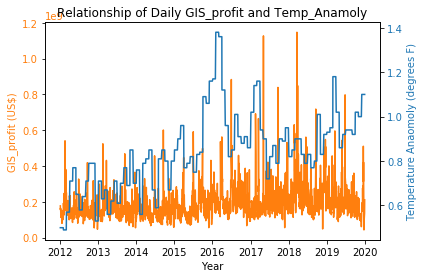

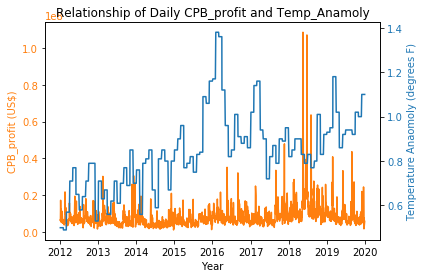

In [18]:
#plotting daily temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CORN_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_profit (US$)', color=color)
ax1.plot(data['CORN_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily WEAT_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_profit (US$)', color=color)
ax1.plot(data['WEAT_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CANE_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_profit (US$)', color=color)
ax1.plot(data['CANE_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily PEP_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_profit (US$)', color=color)
ax1.plot(data['PEP_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily SJM_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_profit (US$)', color=color)
ax1.plot(data['SJM_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily HSY_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_profit (US$)', color=color)
ax1.plot(data['HSY_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily GIS_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_profit (US$)', color=color)
ax1.plot(data['GIS_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CPB_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_profit (US$)', color=color)
ax1.plot(data['CPB_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

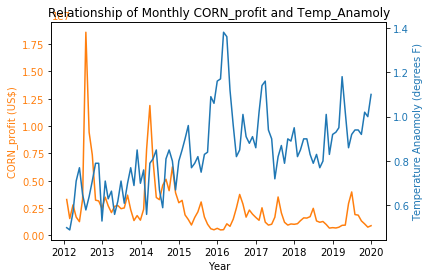

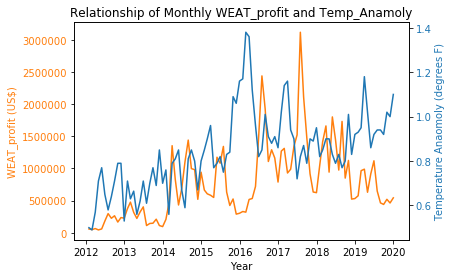

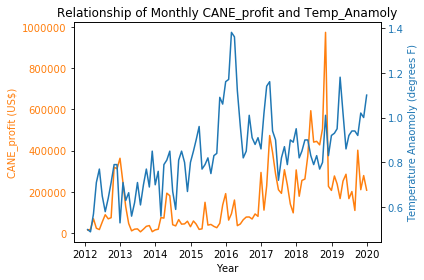

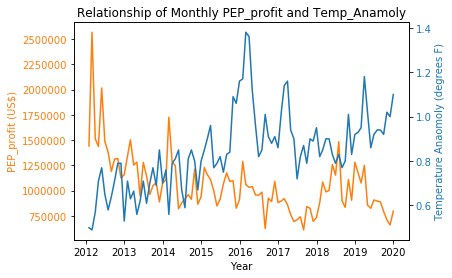

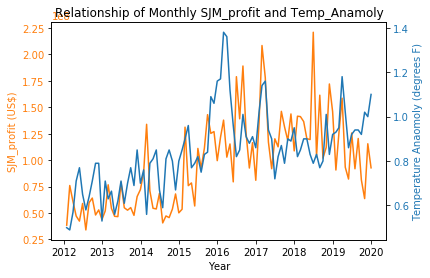

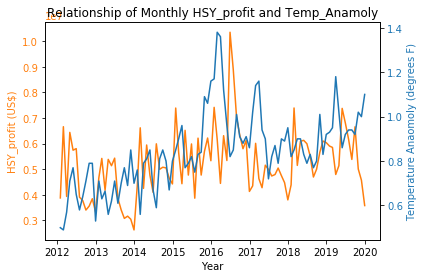

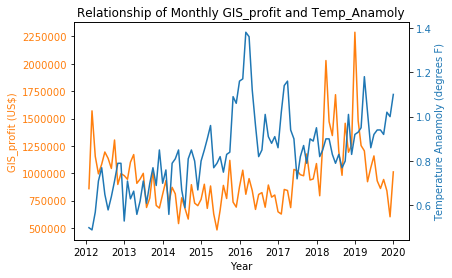

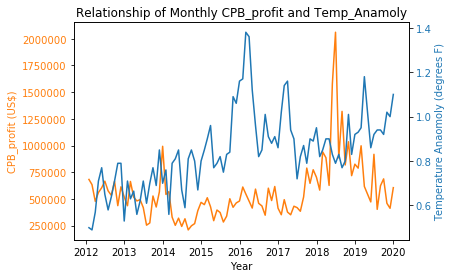

In [19]:
#plotting monthly temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CORN_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_profit (US$)', color=color)
ax1.plot(data_month['CORN_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly WEAT_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_profit (US$)', color=color)
ax1.plot(data_month['WEAT_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CANE_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_profit (US$)', color=color)
ax1.plot(data_month['CANE_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_profit (US$)', color=color)
ax1.plot(data_month['PEP_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly SJM_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_profit (US$)', color=color)
ax1.plot(data_month['SJM_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly HSY_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_profit (US$)', color=color)
ax1.plot(data_month['HSY_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly GIS_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_profit (US$)', color=color)
ax1.plot(data_month['GIS_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CPB_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_profit (US$)', color=color)
ax1.plot(data_month['CPB_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

### Return

In [20]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate daily return for stocks

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close_S'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close_S'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close_S'].pct_change(1)
data['CPB_return'] = data['CPB_Close_S'].pct_change(1)

#fill in NaN
data['CORN_return'].fillna(method='bfill', inplace = True)
data['WEAT_return'].fillna(method='bfill', inplace = True)
data['CANE_return'].fillna(method='bfill', inplace = True)
data['HSY_return'].fillna(method='bfill', inplace = True)
data['SJM_return'].fillna(method='bfill', inplace = True)
data['GIS_return'].fillna(method='bfill', inplace = True)
data['PEP_return'].fillna(method='bfill', inplace = True)
data['CPB_return'].fillna(method='bfill', inplace = True)

#calculate monthly return for stocks
data_month['CORN_return'] = data_month['CORN_Close'].pct_change(1)
data_month['WEAT_return'] = data_month['WEAT_Close'].pct_change(1)
data_month['CANE_return'] = data_month['CANE_Close'].pct_change(1)
data_month['HSY_return'] = data_month['HSY_Close_S'].pct_change(1)
data_month['SJM_return'] = data_month['SJM_Close'].pct_change(1)
data_month['GIS_return'] = data_month['GIS_Close_S'].pct_change(1)
data_month['PEP_return'] = data_month['PEP_Close_S'].pct_change(1)
data_month['CPB_return'] = data_month['CPB_Close_S'].pct_change(1)

#fill in NaN
data_month['CORN_return'].fillna(method='bfill', inplace = True)
data_month['WEAT_return'].fillna(method='bfill', inplace = True)
data_month['CANE_return'].fillna(method='bfill', inplace = True)
data_month['HSY_return'].fillna(method='bfill', inplace = True)
data_month['SJM_return'].fillna(method='bfill', inplace = True)
data_month['GIS_return'].fillna(method='bfill', inplace = True)
data_month['PEP_return'].fillna(method='bfill', inplace = True)
data_month['CPB_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Return v Temp_Anamoly')

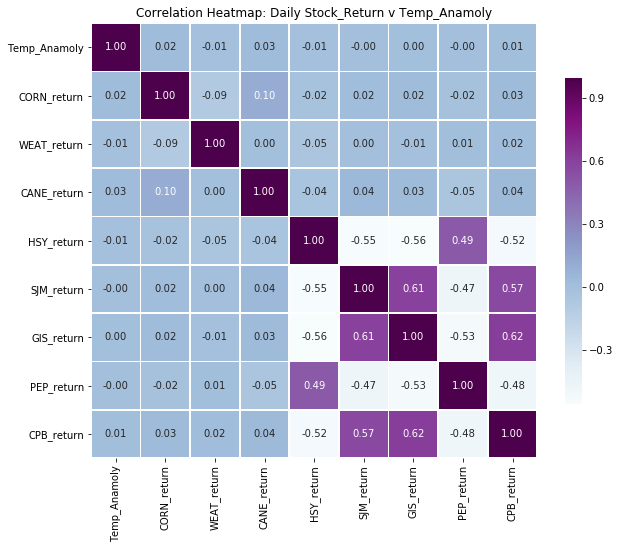

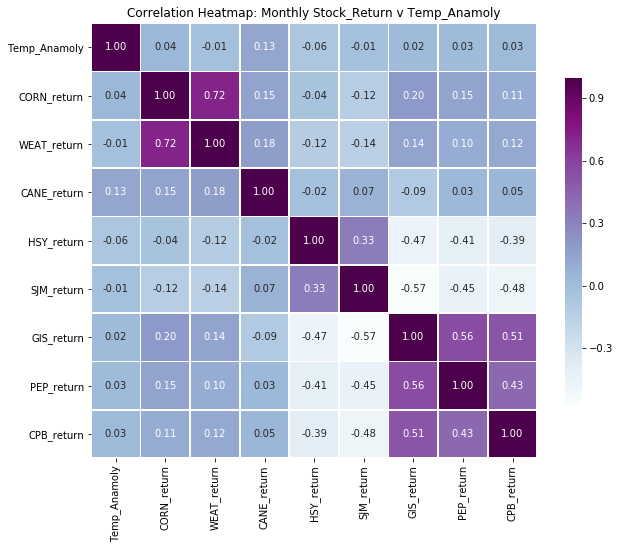

In [21]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#correlation between daily return values in stocks

#no correlation of Temp_Anamoly and daily stock return
stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Return v Temp_Anamoly')

#correlation between monthly return values in stocks

#no correlation between Temp_Anamoly and monthly stock return
stock_per_change = data_month[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Stock_Return v Temp_Anamoly')

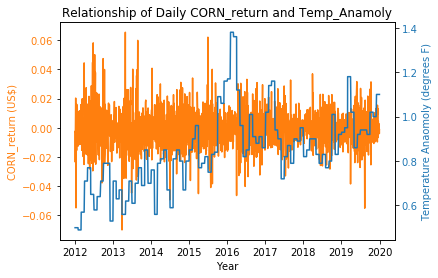

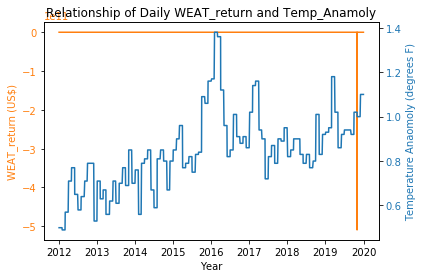

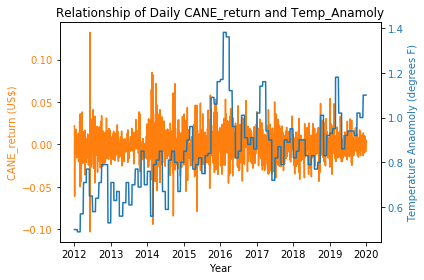

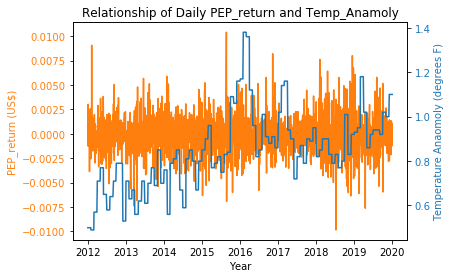

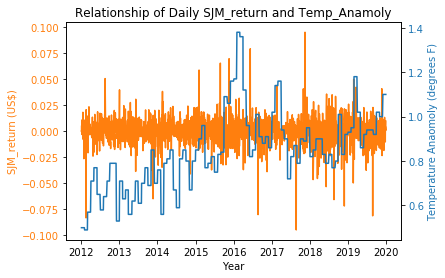

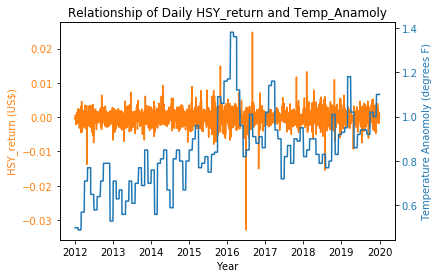

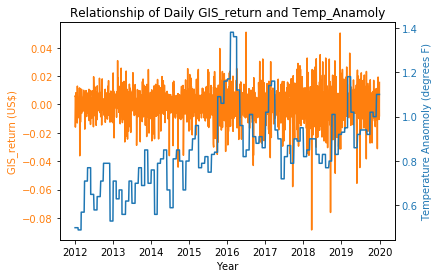

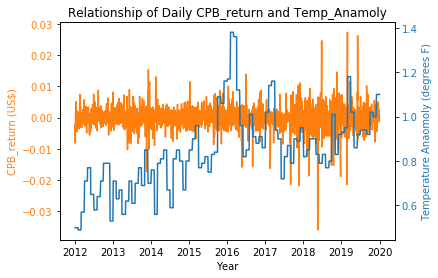

In [22]:
#plotting Daily temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CORN_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_return (US$)', color=color)
ax1.plot(data['CORN_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily WEAT_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_return (US$)', color=color)
ax1.plot(data['WEAT_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CANE_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_return (US$)', color=color)
ax1.plot(data['CANE_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily PEP_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_return (US$)', color=color)
ax1.plot(data['PEP_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily SJM_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_return (US$)', color=color)
ax1.plot(data['SJM_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily HSY_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_return (US$)', color=color)
ax1.plot(data['HSY_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily GIS_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_return (US$)', color=color)
ax1.plot(data['GIS_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CPB_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_return (US$)', color=color)
ax1.plot(data['CPB_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

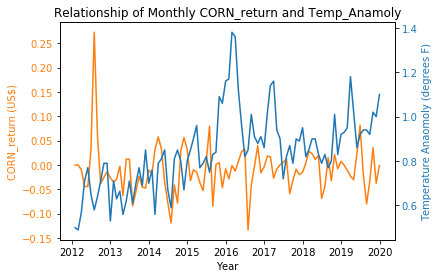

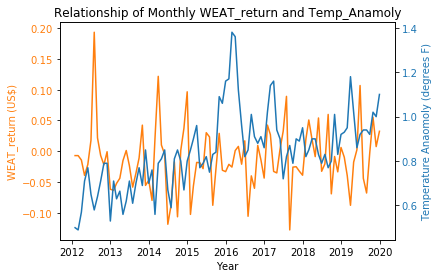

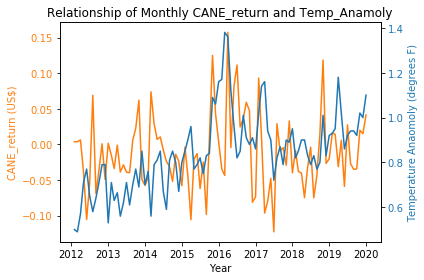

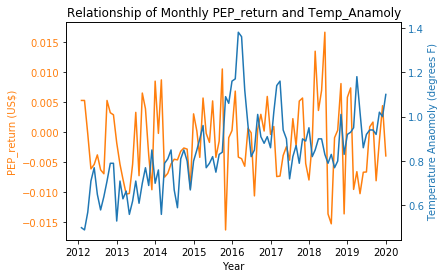

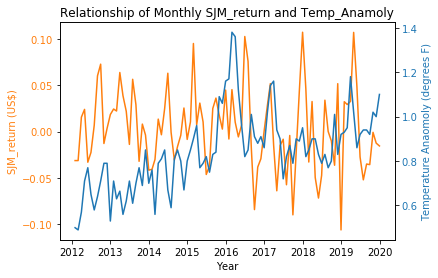

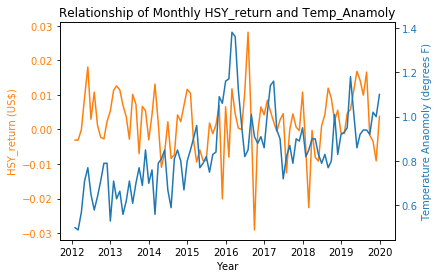

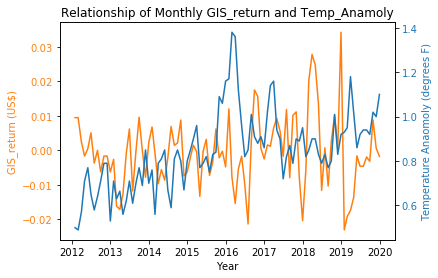

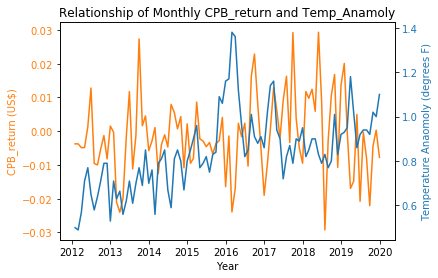

In [23]:
#plotting Monthly temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CORN_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_return (US$)', color=color)
ax1.plot(data_month['CORN_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly WEAT_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_return (US$)', color=color)
ax1.plot(data_month['WEAT_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CANE_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_return (US$)', color=color)
ax1.plot(data_month['CANE_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_return (US$)', color=color)
ax1.plot(data_month['PEP_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly SJM_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_return (US$)', color=color)
ax1.plot(data_month['SJM_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly HSY_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_return (US$)', color=color)
ax1.plot(data_month['HSY_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly GIS_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_return (US$)', color=color)
ax1.plot(data_month['GIS_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CPB_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_return (US$)', color=color)
ax1.plot(data_month['CPB_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

### Cumulative Returns
- Cumulative return is the return computed relative to the day investment

In [24]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#cumulative returns for daily data
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

#cumulative return for monthly data
data_month['CORN_cum_return'] = (1 + data_month['CORN_return']).cumprod()
data_month['WEAT_cum_return'] = (1 + data_month['WEAT_return']).cumprod()
data_month['CANE_cum_return'] = (1 + data_month['CANE_return']).cumprod()
data_month['HSY_cum_return'] = (1 + data_month['HSY_return']).cumprod()
data_month['SJM_cum_return'] = (1 + data_month['SJM_return']).cumprod()
data_month['GIS_cum_return'] = (1 + data_month['GIS_return']).cumprod()
data_month['PEP_cum_return'] = (1 + data_month['PEP_return']).cumprod()
data_month['CPB_cum_return'] = (1 + data_month['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Stock_cum_return v Temp_Anamoly')

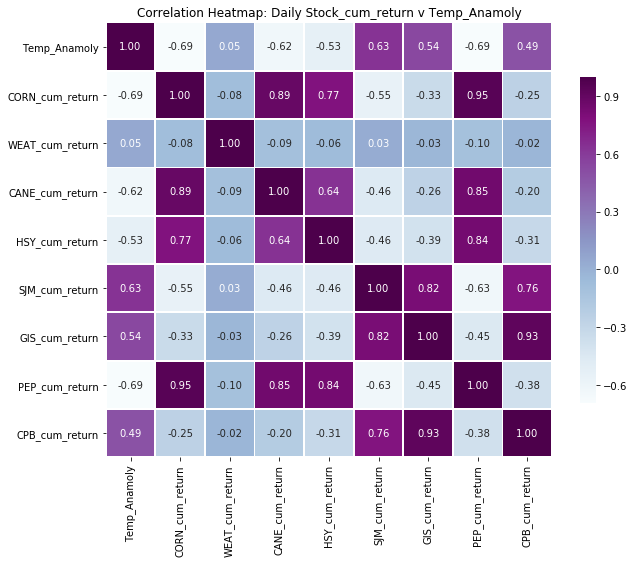

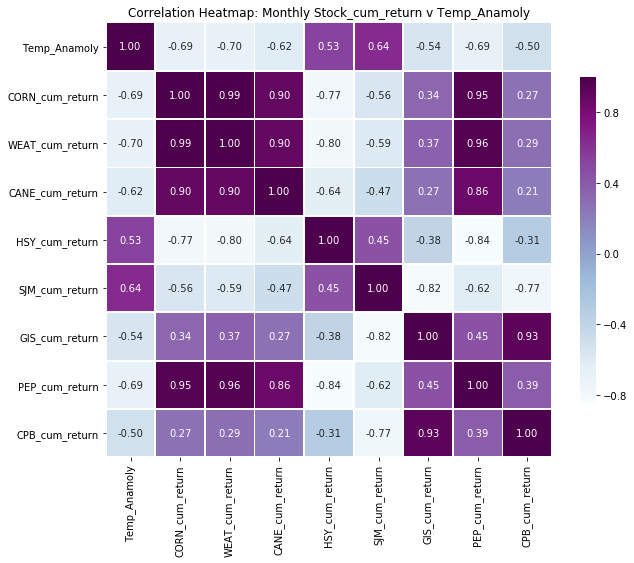

In [25]:
#Correlation with daily cumulative return
#moderate negative correlation of Temp_Anamoly with stock cumulative return
stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Daily Stock_cum_return v Temp_Anamoly')

#Correlation with monthly cumulative return
#moderate negative correlation
stock_per_change = data_month[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Stock_cum_return v Temp_Anamoly')

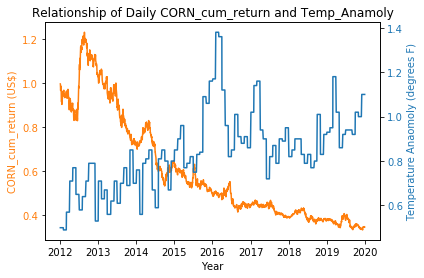

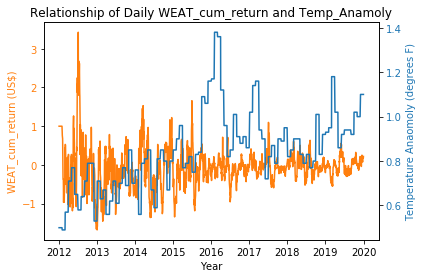

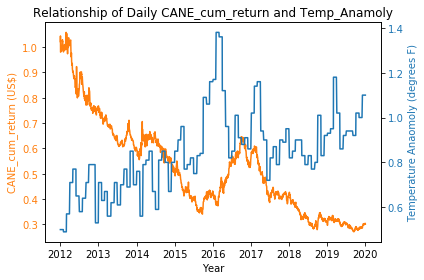

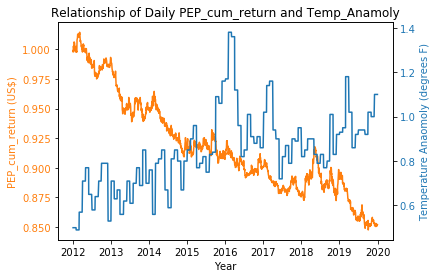

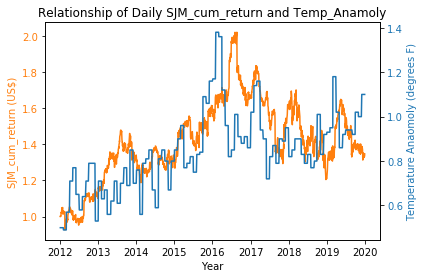

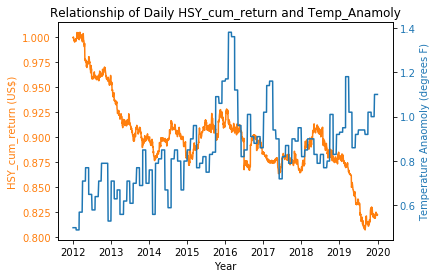

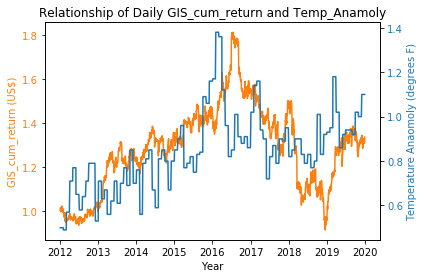

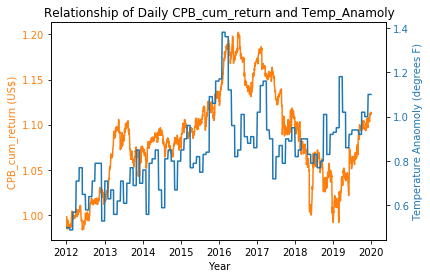

In [26]:
#plotting Daily temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CORN_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_cum_return (US$)', color=color)
ax1.plot(data['CORN_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily WEAT_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_cum_return (US$)', color=color)
ax1.plot(data['WEAT_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CANE_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_cum_return (US$)', color=color)
ax1.plot(data['CANE_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily PEP_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_cum_return (US$)', color=color)
ax1.plot(data['PEP_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily SJM_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_cum_return (US$)', color=color)
ax1.plot(data['SJM_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily HSY_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_cum_return (US$)', color=color)
ax1.plot(data['HSY_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily GIS_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_cum_return (US$)', color=color)
ax1.plot(data['GIS_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily CPB_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_cum_return (US$)', color=color)
ax1.plot(data['CPB_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

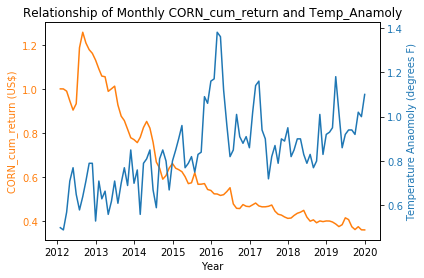

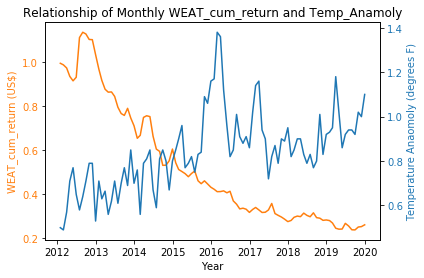

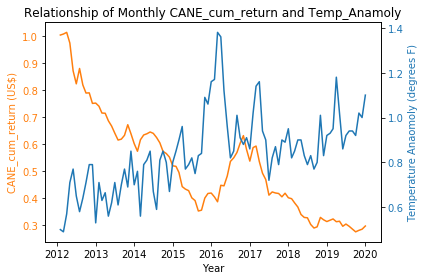

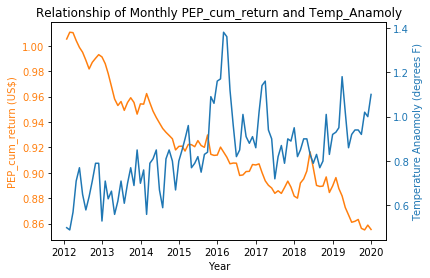

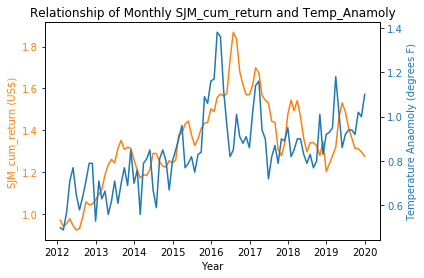

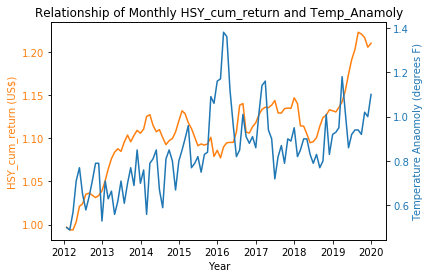

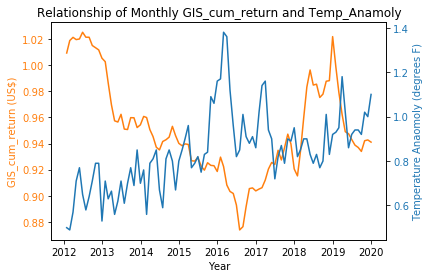

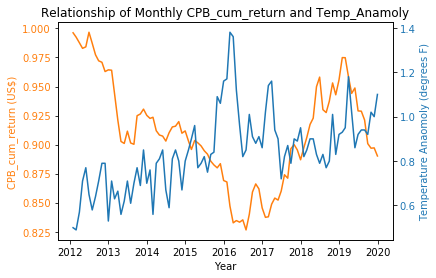

In [27]:
#plotting Monthly temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CORN_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CORN_cum_return (US$)', color=color)
ax1.plot(data_month['CORN_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly WEAT_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('WEAT_cum_return (US$)', color=color)
ax1.plot(data_month['WEAT_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CANE_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CANE_cum_return (US$)', color=color)
ax1.plot(data_month['CANE_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_cum_return (US$)', color=color)
ax1.plot(data_month['PEP_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly SJM_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('SJM_cum_return (US$)', color=color)
ax1.plot(data_month['SJM_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly HSY_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_cum_return (US$)', color=color)
ax1.plot(data_month['HSY_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly GIS_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('GIS_cum_return (US$)', color=color)
ax1.plot(data_month['GIS_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly CPB_cum_return and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPB_cum_return (US$)', color=color)
ax1.plot(data_month['CPB_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

### Covariance

In [28]:
#finding the covariance for all daily stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close_S'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close_S'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close_S'])
i = array(data['CPB_Close_S'])

j = array(data['CORN_profit'])
k = array(data['WEAT_profit'])
l = array(data['CANE_profit'])
m = array(data['HSY_profit'])
n = array(data['SJM_profit'])
o = array(data['GIS_profit'])
p = array(data['PEP_profit'])
q = array(data['CPB_profit'])

r = array(data['CORN_return'])
s = array(data['WEAT_return'])
t = array(data['CANE_return'])
u = array(data['HSY_return'])
v = array(data['SJM_return'])
w = array(data['GIS_return'])
x = array(data['PEP_return'])
y = array(data['CPB_return'])

z = array(data['CORN_cum_return'])
aa = array(data['WEAT_cum_return'])
bb = array(data['CANE_cum_return'])
cc = array(data['HSY_cum_return'])
dd = array(data['SJM_cum_return'])
ee = array(data['GIS_cum_return'])
ff = array(data['PEP_cum_return'])
gg = array(data['CPB_cum_return'])

print('Daily Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a,j)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a,r)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a,z)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a,k)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a,s)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a,aa)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a,l)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a,t)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a,bb)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a,m)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a,u)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a,cc)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a,n)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a,v)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a,dd)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a,o)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a,w)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a,ee)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a,p)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a,x)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a,ff)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a,q)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a,y)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a,gg)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Daily Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and CORN_profit -185198.49115541205
Covariance of Temp_Anamoly and CORN_return 1.58504856322183e-06
Covariance of Temp_Anamoly and CORN_cum_return -0.026638079653732535
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.000819942304155478
Covariance of Temp_Anamoly and WEAT_profit -448.2407597514035
Covariance of Temp_Anamoly and WEAT_return -44349529.531735234
Covariance of Temp_Anamoly and WEAT_cum_return -0.0008736732063453636
CANE
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and CANE_profit 7057.7236892592755
Covariance of Temp_Anamoly and CANE_return 6.571187004042887e-05
Covariance of Temp_Anamoly and CANE_cum_return -0.019250270029464008
HSY
Covariance of Temp_Anamoly and HSY_Close -0.0007888112258523218
Covariance of Temp_Anamoly and HSY_profit 573.4056250603327
Covariance of Temp_Anamoly and HSY_return 3.

In [29]:
#finding the covariance for all monthly stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a1 = array(data_month['Temp_Anamoly'])
b1 = array(data_month['CORN_Close'])
c1 = array(data_month['WEAT_Close'])
d1 = array(data_month['CANE_Close'])
e1 = array(data_month['HSY_Close_S'])
f1 = array(data_month['SJM_Close'])
g1 = array(data_month['GIS_Close_S'])
h1 = array(data_month['PEP_Close_S'])
i1 = array(data_month['CPB_Close_S'])

j1 = array(data_month['CORN_profit'])
k1= array(data_month['WEAT_profit'])
l1 = array(data_month['CANE_profit'])
m1 = array(data_month['HSY_profit'])
n1 = array(data_month['SJM_profit'])
o1 = array(data_month['GIS_profit'])
p1 = array(data_month['PEP_profit'])
q1 = array(data_month['CPB_profit'])

r1 = array(data_month['CORN_return'])
s1 = array(data_month['WEAT_return'])
t1 = array(data_month['CANE_return'])
u1 = array(data_month['HSY_return'])
v1 = array(data_month['SJM_return'])
w1 = array(data_month['GIS_return'])
x1 = array(data_month['PEP_return'])
y1 = array(data_month['CPB_return'])

z1 = array(data_month['CORN_cum_return'])
aa1 = array(data_month['WEAT_cum_return'])
bb1 = array(data_month['CANE_cum_return'])
cc1 = array(data_month['HSY_cum_return'])
dd1 = array(data_month['SJM_cum_return'])
ee1 = array(data_month['GIS_cum_return'])
ff1 = array(data_month['PEP_cum_return'])
gg1 = array(data_month['CPB_cum_return'])

print('Monthly Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a1,b1)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a1,j1)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a1,r1)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a1,z1)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a1,c1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a1,k1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a1,s1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a1,aa1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a1,d1)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a1,l1)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a1,t1)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a1,bb1)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a1,e1)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a1,m1)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a1,u1)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a1,cc1)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a1,f1)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a1,n1)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a1,v1)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a1,dd1)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a1,g1)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a1,o1)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a1,w1)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a1,ee1)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a1,h1)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a1,p1)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a1,x1)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a1,ff1)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a1,i1)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a1,q1)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a1,y1)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a1,gg1)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Monthly Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1534558774493961
Covariance of Temp_Anamoly and CORN_profit -186579.36027291414
Covariance of Temp_Anamoly and CORN_return -0.0002918565636518181
Covariance of Temp_Anamoly and CORN_cum_return -0.02833974155487258
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6632624820760709
Covariance of Temp_Anamoly and WEAT_profit 18759.492932628662
Covariance of Temp_Anamoly and WEAT_return -0.00024469088294407207
Covariance of Temp_Anamoly and WEAT_cum_return -0.030627763199485486
CANE
Covariance of Temp_Anamoly and CANE_Close -0.45565727374435633
Covariance of Temp_Anamoly and CANE_profit 6943.182995942329
Covariance of Temp_Anamoly and CANE_return 0.0016354301794104596
Covariance of Temp_Anamoly and CANE_cum_return -0.019536560256708507
HSY
Covariance of Temp_Anamoly and HSY_Close 0.016179424285813076
Covariance of Temp_Anamoly and HSY_profit 47080.20904026297
Covariance of Temp_Anamoly and HSY_return 

### Granger Causality

### Null hyp: Stock_Close is not Granger caused by Temp Anamoly

In [30]:
#evaluation if the daily closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data[['Temp_Anamoly','WEAT_Close_S']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data[['Temp_Anamoly','CANE_Close']], maxlag=4)) #ACCEPT NULL
print('HSY_Close',grangercausalitytests(data[['Temp_Anamoly','HSY_Close_S']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['Temp_Anamoly','GIS_Close']], maxlag=4)) #reject NULL
print('PEP_Close',grangercausalitytests(data[['Temp_Anamoly','PEP_Close_S']], maxlag=4)) #reject NULL
print('CPB_Close',grangercausalitytests(data[['Temp_Anamoly','CPB_Close_S']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [31]:
#evaluation if the monthly closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data_month[['Temp_Anamoly','CORN_Close']], maxlag=4)) #accept NULL
print('WEAT_Close',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #accept NULL
print('CANE_Close',grangercausalitytests(data_month[['Temp_Anamoly','CANE_Close']], maxlag=4)) #reject NULL
print('HSY_Close',grangercausalitytests(data_month[['Temp_Anamoly','HSY_Close_S']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data_month[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data_month[['Temp_Anamoly','GIS_Close_S']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data_month[['Temp_Anamoly','PEP_Close_S']], maxlag=4)) #ACCEPT NULL
print('CPB_Close',grangercausalitytests(data_month[['Temp_Anamoly','CPB_Close_S']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

### Null hyp: Stock_profit is not granger caused by Temp_Anamoly

In [32]:
#evaluation if the daily closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data[['Temp_Anamoly','HSY_profit']], maxlag=4)) #accept NULL
print('SJM_profit',grangercausalitytests(data[['Temp_Anamoly','SJM_profit']], maxlag=4)) #reject NULL
print('GIS_profit',grangercausalitytests(data[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.2868  , p=0.5923  , df=1
likelihood ratio test: chi2=0.2868  , p=0.5923  , df=1
parameter F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3038  , p=0.8591  , df=2
likelihood ratio test: chi2=0.3038  , p=0.8591  , df=2
parameter F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.3463  , p=0.9511  , df=3
likelihood ratio test: chi2=0.3463  , p=0.9511  , df=3
parameter F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1886  , p=0.

In [33]:
#evaluation if the monthly closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data_month[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data_month[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data_month[['Temp_Anamoly','HSY_profit']], maxlag=4)) #accept NULL
print('SJM_profit',grangercausalitytests(data_month[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data_month[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data_month[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data_month[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0336  , p=0.8546  , df=1
likelihood ratio test: chi2=0.0336  , p=0.8546  , df=1
parameter F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.1930  , p=0.9080  , df=2
likelihood ratio test: chi2=0.1928  , p=0.9081  , df=2
parameter F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=2.3451  , p=0.5039  , df=3
likelihood ratio test: chi2=2.3160  , p=0.5095  , df=3
parameter F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3495  , p=0.8437  , df_d

### Null hyp: Stock_return is not granger caused by Temp_Anamoly

In [34]:
#evaluation if the daily return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data[['Temp_Anamoly','CORN_return']], maxlag=4)) #reject NULL
print('WEAT_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_return']], maxlag=4)) #accept NULL
print('CANE_return',grangercausalitytests(data[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=11.7726 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7383 , p=0.0006  , df=1
parameter F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=12.2099 , p=0.0022  , df=2
likelihood ratio test: chi2=12.1730 , p=0.0023  , df=2
parameter F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=13.3606 , p=0.0039  , df=3
likelihood ratio test: chi2=13.3164 , p=0.0040  , df=3
parameter F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4654  , p=0.

In [35]:
#evaluation if the monthly return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_return']], maxlag=4)) #ACCEPT NULL
print('WEAT_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_return']], maxlag=4)) #ACCEPT NULL
print('CANE_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0472  , p=0.8281  , df=1
likelihood ratio test: chi2=0.0472  , p=0.8281  , df=1
parameter F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.7000  , p=0.7047  , df=2
likelihood ratio test: chi2=0.6974  , p=0.7056  , df=2
parameter F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=1.2914  , p=0.7312  , df=3
likelihood ratio test: chi2=1.2825  , p=0.7333  , df=3
parameter F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4275  , p=0.7884  , df_d

### Null hyp: Stock_cum_return is not granger caused by Temp_Anamoly

In [36]:
#evaluation if the cumulative return for the daily stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #ACCEPT null
print('HSY_cum_return',grangercausalitytests(data[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #ACCEPT null
print('SJM_cum_return',grangercausalitytests(data[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #reject null
print('PEP_cum_return',grangercausalitytests(data[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #REJECT null
print('CPB_cum_return',grangercausalitytests(data[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [37]:
#evaluation if the cumulative return for the monthly stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #accept null
print('WEAT_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #accept null
print('CANE_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #REJECT null
print('HSY_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

# Research Question 3
**3. What relationship (if any) exists between commodity stocks and company stocks?**

### Correlation

Text(0.5,1,'Correlation Heatmap: Monthly Close')

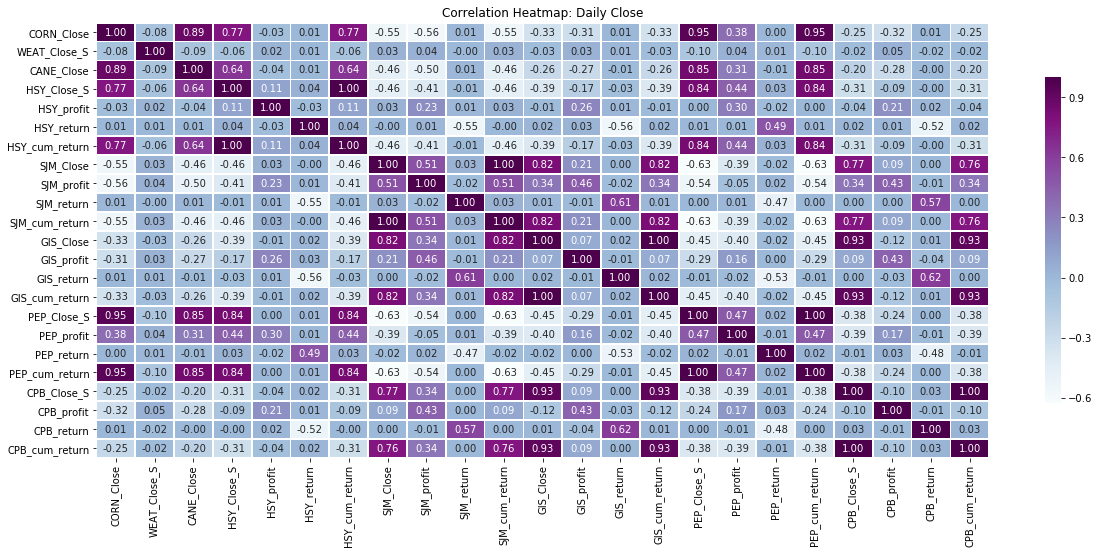

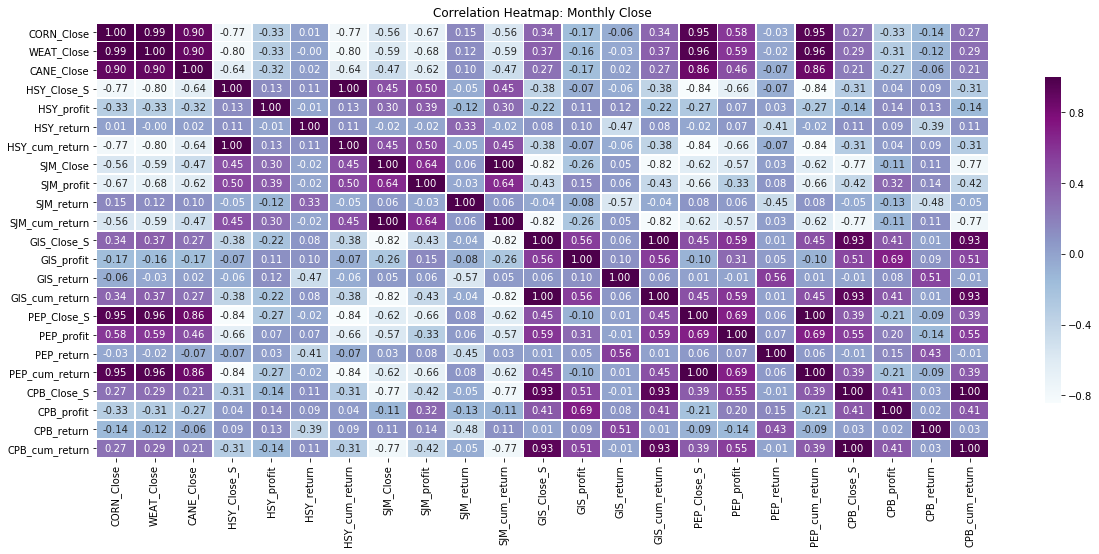

In [38]:
#correlation between daily stock_Close and company stocks

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['CORN_Close','WEAT_Close_S','CANE_Close','HSY_Close_S','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close_S','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close_S','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Close')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close_S','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close_S','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close_S','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close_S','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Close')

### Covariance

In [39]:
#finding the covariance for all daily stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['CORN_Close'])
b = array(data['WEAT_Close_S'])
c = array(data['CANE_Close'])
d = array(data['HSY_Close_S'])
e = array(data['SJM_Close'])
f = array(data['GIS_Close'])
g = array(data['PEP_Close_S'])
h = array(data['CPB_Close_S'])

i = array(data['HSY_profit'])
j = array(data['SJM_profit'])
k = array(data['GIS_profit'])
l = array(data['PEP_profit'])
m = array(data['CPB_profit'])

n = array(data['HSY_return'])
o = array(data['SJM_return'])
p = array(data['GIS_return'])
q = array(data['PEP_return'])
r = array(data['CPB_return'])

s = array(data['HSY_cum_return'])
t = array(data['SJM_cum_return'])
u = array(data['GIS_cum_return'])
v = array(data['PEP_cum_return'])
w = array(data['CPB_cum_return'])

print('Daily Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Daily Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close 0.07170275305267002
Covariance of CORN_Close and HSY_profit -75862.573979189
Covariance of CORN_Close and HSY_return -0.00040048669839373816
Covariance of CORN_Close and HSY_cum_return 0.29436060841230877
SJM
Covariance of CORN_Close and SJM_Close -115.94602149349058
Covariance of CORN_Close and SJM_profit -277570957.97993034
Covariance of CORN_Close and SJM_return 0.004010085491591711
Covariance of CORN_Close and SJM_cum_return -1.499560446608798
GIS
Covariance of CORN_Close and GIS_Close -40.9424700893594
Covariance of CORN_Close and GIS_profit -223430184.363508
Covariance of CORN_Close and GIS_return 0.002678570287678322
Covariance of CORN_Close and GIS_cum_return -1.021992461884887
PEP
Covariance of CORN_Close and PEP_Close 0.08984400088720476
Covariance of CORN_Close and PEP_profit 1639382.5445574054
Covariance of CORN_Close and PEP_return -0.00018637389856865952
Covariance of CORN_Close a

In [40]:
#Covariance measures for WEAT_Close v company
print('Daily Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Daily Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close 7.479137029877187e-05
Covariance of WEAT_Close and HSY_profit -1151.931685371771
Covariance of WEAT_Close and HSY_return 8.904377640690805e-06
Covariance of WEAT_Close and HSY_cum_return 0.0003070402784808402
SJM
Covariance of WEAT_Close and SJM_Close -0.49370392960110554
Covariance of WEAT_Close and SJM_profit 41518.32036066576
Covariance of WEAT_Close and SJM_return -1.5584824789571042e-06
Covariance of WEAT_Close and SJM_cum_return -0.006385203007648776
GIS
Covariance of WEAT_Close and GIS_Close -0.29010686850551426
Covariance of WEAT_Close and GIS_profit 301143.933513384
Covariance of WEAT_Close and GIS_return 2.851490642107571e-05
Covariance of WEAT_Close and GIS_cum_return -0.007241552161033967
PEP
Covariance of WEAT_Close and PEP_Close -6.128653024745591e-05
Covariance of WEAT_Close and PEP_profit 9457.444595969662
Covariance of WEAT_Close and PEP_return 8.838249482135652e-06
Covariance 

In [41]:
#Covariance measures for CANE_Close v company
print('Daily Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Daily Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close 0.03195234381802747
Covariance of CANE_Close and HSY_profit 5584.080680326487
Covariance of CANE_Close and HSY_return -0.00016284912779662158
Covariance of CANE_Close and HSY_cum_return 0.13117364349406405
SJM
Covariance of CANE_Close and SJM_Close -39.14008396611875
Covariance of CANE_Close and SJM_profit -99842106.34881094
Covariance of CANE_Close and SJM_return 0.001138489231654761
Covariance of CANE_Close and SJM_cum_return -0.5062090189600348
GIS
Covariance of CANE_Close and GIS_Close -11.901257249738773
Covariance of CANE_Close and GIS_profit -87058307.20454338
Covariance of CANE_Close and GIS_return 0.00019359356852526876
Covariance of CANE_Close and GIS_cum_return -0.29707526609018386
PEP
Covariance of CANE_Close and PEP_Close 0.03696072499733324
Covariance of CANE_Close and PEP_profit 712462.6161207788
Covariance of CANE_Close and PEP_return -0.00011188648948097606
Covariance of CANE_C

In [42]:
#finding the covariance for all monthly stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data_month['CORN_Close'])
b = array(data_month['WEAT_Close'])
c = array(data_month['CANE_Close'])
d = array(data_month['HSY_Close_S'])
e = array(data_month['SJM_Close'])
f = array(data_month['GIS_Close_S'])
g = array(data_month['PEP_Close_S'])
h = array(data_month['CPB_Close_S'])

i = array(data_month['HSY_profit'])
j = array(data_month['SJM_profit'])
k = array(data_month['GIS_profit'])
l = array(data_month['PEP_profit'])
m = array(data_month['CPB_profit'])

n = array(data_month['HSY_return'])
o = array(data_month['SJM_return'])
p = array(data_month['GIS_return'])
q = array(data_month['PEP_return'])
r = array(data_month['CPB_return'])

s = array(data_month['HSY_cum_return'])
t = array(data_month['SJM_cum_return'])
u = array(data_month['GIS_cum_return'])
v = array(data_month['PEP_cum_return'])
w = array(data_month['CPB_cum_return'])

print('Monthly Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -1.4820593462318683
Covariance of CORN_Close and HSY_profit -4811034.753102959
Covariance of CORN_Close and HSY_return 0.00680637440496577
Covariance of CORN_Close and HSY_cum_return -0.3589613389957515
SJM
Covariance of CORN_Close and SJM_Close -117.47825131715295
Covariance of CORN_Close and SJM_profit -281244028.86982906
Covariance of CORN_Close and SJM_return 0.07023293570328507
Covariance of CORN_Close and SJM_cum_return -1.43697649511411
GIS
Covariance of CORN_Close and GIS_Close 0.05631026875548298
Covariance of CORN_Close and GIS_profit -220048.25306290842
Covariance of CORN_Close and GIS_return -0.012687591398202766
Covariance of CORN_Close and GIS_cum_return 0.2102902131945946
PEP
Covariance of CORN_Close and PEP_Close 0.0911270472098583
Covariance of CORN_Close and PEP_profit 1669345.5706422357
Covariance of CORN_Close and PEP_return -0.002878978338929356
Covariance of CORN_Close a

In [43]:
#Covariance measures for WEAT_Close v company
print('Monthly Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Monthly Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -0.8774304197742562
Covariance of WEAT_Close and HSY_profit -2746204.9316586107
Covariance of WEAT_Close and HSY_return 0.0033332187306211237
Covariance of WEAT_Close and HSY_cum_return -0.2125175345768478
SJM
Covariance of WEAT_Close and SJM_Close -70.35085024030225
Covariance of WEAT_Close and SJM_profit -165899973.34124163
Covariance of WEAT_Close and SJM_return 0.03277347245303766
Covariance of WEAT_Close and SJM_cum_return -0.8605211353860762
GIS
Covariance of WEAT_Close and GIS_Close 0.03354106679380707
Covariance of WEAT_Close and GIS_profit -136601.72315363723
Covariance of WEAT_Close and GIS_return -0.006292993907646786
Covariance of WEAT_Close and GIS_cum_return 0.12525882477087336
PEP
Covariance of WEAT_Close and PEP_Close 0.053208498714033194
Covariance of WEAT_Close and PEP_profit 998221.8315945958
Covariance of WEAT_Close and PEP_return -0.0014337101113364615
Covariance of WEAT_

In [44]:
#Covariance measures for CANE_Close v company
print('Monthly Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -0.6557159717001235
Covariance of CANE_Close and HSY_profit -1384004.6092572862
Covariance of CANE_Close and HSY_return 0.002258437200832118
Covariance of CANE_Close and HSY_cum_return -0.15881731308589017
SJM
Covariance of CANE_Close and SJM_Close -39.817934558257406
Covariance of CANE_Close and SJM_profit -101695064.85002534
Covariance of CANE_Close and SJM_return 0.013737568141872459
Covariance of CANE_Close and SJM_cum_return -0.48704705256242997
GIS
Covariance of CANE_Close and GIS_Close 0.01813431714477406
Covariance of CANE_Close and GIS_profit -171414.55417696692
Covariance of CANE_Close and GIS_return -0.0001566484935875775
Covariance of CANE_Close and GIS_cum_return 0.06772245103414878
PEP
Covariance of CANE_Close and PEP_Close 0.03748527884631013
Covariance of CANE_Close and PEP_profit 725909.1602805202
Covariance of CANE_Close and PEP_return -0.00097019891562543
Covariance of CANE

### Granger Causality

In [45]:
#evaluation if the daily features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data[['CORN_Close','HSY_Close_S']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CORN_Close','PEP_Close_S']], maxlag=4)) #reject null
print('CPB_Close',grangercausalitytests(data[['CORN_Close','CPB_Close_S']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CORN_Close','PEP_cum_return']], maxlag=4)) #reject null
print('CPB_cum_return',grangercausalitytests(data[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0297  , p=0.1544  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=2.0328  , p=0.1539  , df=1
likelihood ratio test: chi2=2.0317  , p=0.1540  , df=1
parameter F test:         F=2.0297  , p=0.1544  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6307  , p=0.0723  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=5.2746  , p=0.0716  , df=2
likelihood ratio test: chi2=5.2677  , p=0.0718  , df=2
parameter F test:         F=2.6307  , p=0.0723  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7258  , p=0.0428  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=8.2059  , p=0.0419  , df=3
likelihood ratio test: chi2=8.1892  , p=0.0423  , df=3
parameter F test:         F=2.7258  , p=0.0428  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0841  , p=0.

In [46]:
#evaluation if the daily features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data[['WEAT_Close_S','HSY_Close_S']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['WEAT_Close_S','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['WEAT_Close_S','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['WEAT_Close_S','PEP_Close_S']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['WEAT_Close_S','CPB_Close_S']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data[['WEAT_Close_S','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['WEAT_Close_S','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['WEAT_Close_S','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['WEAT_Close_S','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['WEAT_Close_S','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data[['WEAT_Close_S','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['WEAT_Close_S','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['WEAT_Close_S','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['WEAT_Close_S','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['WEAT_Close_S','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data[['WEAT_Close_S','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['WEAT_Close_S','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['WEAT_Close_S','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['WEAT_Close_S','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['WEAT_Close_S','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0613  , p=0.8045  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.0614  , p=0.8044  , df=1
likelihood ratio test: chi2=0.0614  , p=0.8044  , df=1
parameter F test:         F=0.0613  , p=0.8045  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1436  , p=0.8663  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.2878  , p=0.8660  , df=2
likelihood ratio test: chi2=0.2878  , p=0.8660  , df=2
parameter F test:         F=0.1436  , p=0.8663  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1538  , p=0.9273  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.4629  , p=0.9270  , df=3
likelihood ratio test: chi2=0.4629  , p=0.9270  , df=3
parameter F test:         F=0.1538  , p=0.9273  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2162  , p=0.

In [47]:
#evaluation if the daily features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data[['CANE_Close','HSY_Close_S']], maxlag=4)) #reject null
print('SJM_Close',grangercausalitytests(data[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CANE_Close','PEP_Close_S']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CANE_Close','CPB_Close_S']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data[['CANE_Close','HSY_return']], maxlag=4)) #reject null
print('SJM_return',grangercausalitytests(data[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data[['CANE_Close','HSY_cum_return']], maxlag=4)) #reject null
print('SJM_cum_return',grangercausalitytests(data[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5097  , p=0.2193  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.5120  , p=0.2188  , df=1
likelihood ratio test: chi2=1.5114  , p=0.2189  , df=1
parameter F test:         F=1.5097  , p=0.2193  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.1231  , p=0.0163  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=8.2668  , p=0.0160  , df=2
likelihood ratio test: chi2=8.2499  , p=0.0162  , df=2
parameter F test:         F=4.1231  , p=0.0163  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9023  , p=0.0337  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=8.7374  , p=0.0330  , df=3
likelihood ratio test: chi2=8.7184  , p=0.0333  , df=3
parameter F test:         F=2.9023  , p=0.0337  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9719  , p=0.

In [48]:
#evaluation if the monthly features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data_month[['CORN_Close','HSY_Close_S']], maxlag=4)) #reject null
print('SJM_Close',grangercausalitytests(data_month[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CORN_Close','GIS_Close_S']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CORN_Close','PEP_Close_S']], maxlag=4)) #reject null
print('CPB_Close',grangercausalitytests(data_month[['CORN_Close','CPB_Close_S']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data_month[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CORN_Close','PEP_profit']], maxlag=4)) #reject null
print('CPB_profit',grangercausalitytests(data_month[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data_month[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CORN_Close','HSY_cum_return']], maxlag=4)) #reject null
print('SJM_cum_return',grangercausalitytests(data_month[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CORN_Close','PEP_cum_return']], maxlag=4)) #reject null
print('CPB_cum_return',grangercausalitytests(data_month[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4787  , p=0.1188  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=2.5595  , p=0.1096  , df=1
likelihood ratio test: chi2=2.5257  , p=0.1120  , df=1
parameter F test:         F=2.4787  , p=0.1188  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6585  , p=0.1963  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=3.5034  , p=0.1735  , df=2
likelihood ratio test: chi2=3.4397  , p=0.1791  , df=2
parameter F test:         F=1.6585  , p=0.1963  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.2038  , p=0.0080  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=13.6379 , p=0.0034  , df=3
likelihood ratio test: chi2=12.7261 , p=0.0053  , df=3
parameter F test:         F=4.2038  , p=0.0080  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4328  , p=0.0120  , df_d

In [49]:
#evaluation if the monthly features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data_month[['WEAT_Close','HSY_Close_S']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['WEAT_Close','GIS_Close_S']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['WEAT_Close','PEP_Close_S']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['WEAT_Close','CPB_Close_S']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data_month[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['WEAT_Close','PEP_profit']], maxlag=4)) #reject null
print('CPB_profit',grangercausalitytests(data_month[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data_month[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data_month[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6487  , p=0.4227  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.6699  , p=0.4131  , df=1
likelihood ratio test: chi2=0.6675  , p=0.4139  , df=1
parameter F test:         F=0.6487  , p=0.4227  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6372  , p=0.5312  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=1.3461  , p=0.5102  , df=2
likelihood ratio test: chi2=1.3365  , p=0.5126  , df=2
parameter F test:         F=0.6372  , p=0.5312  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9798  , p=0.1230  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=6.4227  , p=0.0928  , df=3
likelihood ratio test: chi2=6.2107  , p=0.1018  , df=3
parameter F test:         F=1.9798  , p=0.1230  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5383  , p=0.1987  , df_d

In [50]:
#evaluation if the monthly features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data_month[['CANE_Close','HSY_Close_S']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CANE_Close','GIS_Close_S']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CANE_Close','PEP_Close_S']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CANE_Close','CPB_Close_S']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data_month[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data_month[['CANE_Close','HSY_return']], maxlag=4)) #reject null
print('SJM_return',grangercausalitytests(data_month[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3116  , p=0.5781  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.3217  , p=0.5706  , df=1
likelihood ratio test: chi2=0.3212  , p=0.5709  , df=1
parameter F test:         F=0.3116  , p=0.5781  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2272  , p=0.7972  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.4799  , p=0.7867  , df=2
likelihood ratio test: chi2=0.4787  , p=0.7872  , df=2
parameter F test:         F=0.2272  , p=0.7972  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0809  , p=0.1087  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=6.7510  , p=0.0803  , df=3
likelihood ratio test: chi2=6.5172  , p=0.0890  , df=3
parameter F test:         F=2.0809  , p=0.1087  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1828  , p=0.0780  , df_d

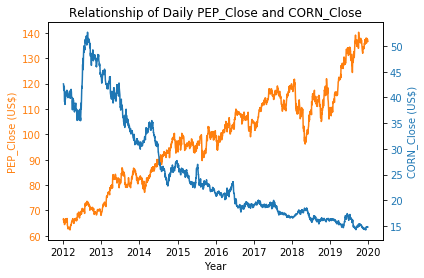

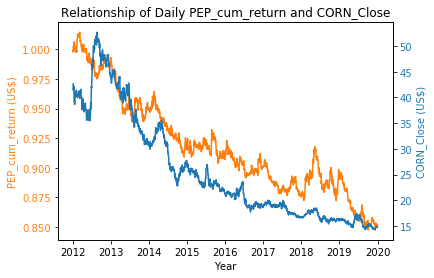

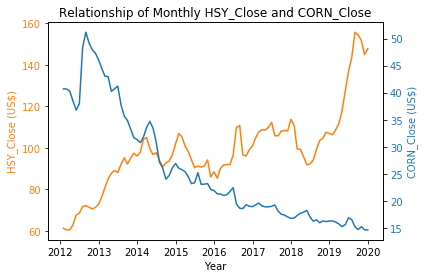

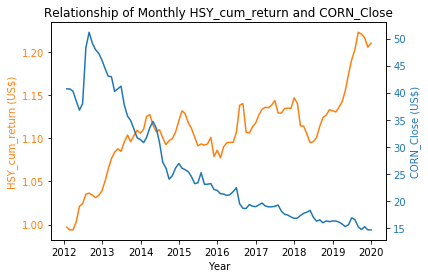

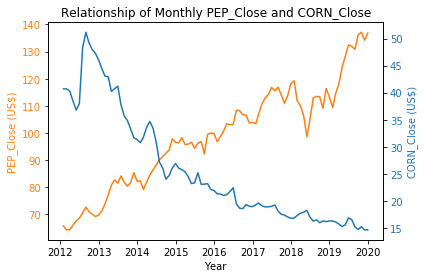

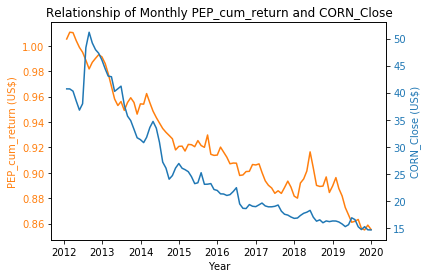

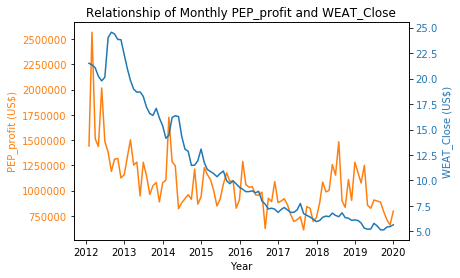

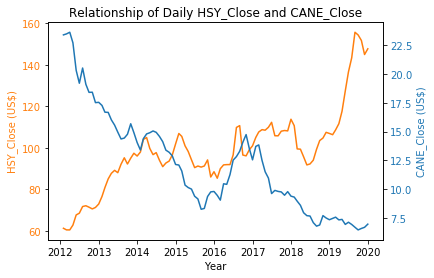

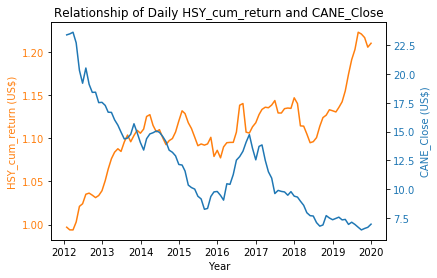

In [59]:
#plotting Monthly temp anomoly and comodity stock closing prices---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily PEP_Close and CORN_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_Close (US$)', color=color)
ax1.plot(data['PEP_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORN_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['CORN_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph2
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily PEP_cum_return and CORN_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_cum_return (US$)', color=color)
ax1.plot(data['PEP_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORN_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['CORN_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph3
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly HSY_Close and CORN_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_Close (US$)', color=color)
ax1.plot(data_month['HSY_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORN_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['CORN_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph4
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly HSY_cum_return and CORN_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_cum_return (US$)', color=color)
ax1.plot(data_month['HSY_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORN_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['CORN_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph5
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_Close and CORN_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_Close (US$)', color=color)
ax1.plot(data_month['PEP_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORN_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['CORN_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph6
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_cum_return and CORN_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_cum_return (US$)', color=color)
ax1.plot(data_month['PEP_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CORN_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['CORN_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph7
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly PEP_profit and WEAT_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('PEP_profit (US$)', color=color)
ax1.plot(data_month['PEP_profit'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('WEAT_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['WEAT_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph8
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily HSY_Close and CANE_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_Close (US$)', color=color)
ax1.plot(data_month['HSY_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CANE_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['CANE_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Graph9
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Daily HSY_cum_return and CANE_Close')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('HSY_cum_return (US$)', color=color)
ax1.plot(data_month['HSY_cum_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('CANE_Close (US$)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['CANE_Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


# Research Question 4
**4. Does any volatility exist in the data that can associated with climate anomalies?**

### Volatility

**Standard Deviation**

In [52]:
#take monthly standard deviation from daily dataset
#add to results to monthly dataset
#see if there is a relationship with Temp_Anamoly via correlation, covariance, granger causality

In [53]:
#take monthly standard deviation from daily dataset
#https://stackoverflow.com/questions/47481473/creating-sum-mean-and-standard-deviation-for-each-month-from-time-series-in-a-d
data_target = data
new_df = data_target.groupby([data_target.index.year, data_target.index.month]).agg(['std'])
new_df.index.set_names(['Year', 'Month'], inplace = True)
new_df.reset_index(inplace = True)
new_df

Year Month Year Temp_Anamoly Avg_Temp_F Avg_Precip_In CORN_Open CORN_High  \
                std          std        std           std       std       std   
0   2012     1  0.0          0.0        0.0           0.0  1.306240  1.256444   
1   2012     2  0.0          0.0        0.0           0.0  0.481641  0.416050   
2   2012     3  0.0          0.0        0.0           0.0  0.814934  0.791902   
3   2012     4  0.0          0.0        0.0           0.0  0.737064  0.715420   
4   2012     5  0.0          0.0        0.0           0.0  0.805386  0.761442   
..   ...   ...  ...          ...        ...           ...       ...       ...   
91  2019     8  0.0          0.0        0.0           0.0  0.540570  0.550442   
92  2019     9  0.0          0.0        0.0           0.0  0.168631  0.195203   
93  2019    10  0.0          0.0        0.0           0.0  0.121139  0.102358   
94  2019    11  0.0          0.0        0.0           0.0  0.218422  0.210840   
95  2019    12  0.0          0.0        0.0           0.0  0.196605  0.183425   

    CORN_Low CORN_Close  ... PEP_return CPB_return CORN_cum_return  \
         std        std  ...        std        std             std   
0   1.257598   1.217874  ...   0.001738   0.003066        0.028501   
1   0.455638   0.439654  ...   0.002277   0.002326        0.010289   
2   0.972143   0.982019  ...   0.001159   0.001814        0.022982   
3   0.759441   0.827865  ...   0.001491   0.002063        0.019374   
4   0.803756   0.754831  ...   0.002061   0.002128        0.017665   
..       ...        ...  ...        ...        ...             ...   
91  0.514330   0.558342  ...   0.002400   0.004239        0.013067   
92  0.193044   0.220212  ...   0.001719   0.002822        0.005154   
93  0.113430   0.123701  ...   0.002114   0.002361        0.002895   
94  0.207235   0.205083  ...   0.001266   0.002650        0.004799   
95  0.206037   0.208314  ...   0.001228   0.002295        0.004875   

   WEAT_cum_return CANE_cum_return HSY_cum_return SJM_cum_return  \
               std             std            std            std   
0         0.000000        0.018480       0.001456       0.017826   
1         0.655532        0.021167       0.002244       0.038601   
2         0.399485        0.021483       0.002417       0.028795   
3         0.440125        0.042428       0.008861       0.012846   
4         0.778250        0.024940       0.002210       0.012047   
..             ...             ...            ...            ...   
91        0.073500        0.005050       0.003267       0.049091   
92        0.113208        0.005198       0.003759       0.018846   
93        0.087989        0.004215       0.005385       0.010285   
94        0.090610        0.002010       0.003614       0.016757   
95        0.082409        0.005178       0.001765       0.022296   

   GIS_cum_return PEP_cum_return CPB_cum_return  
              std            std            std  
0        0.008844       0.002603       0.003970  
1        0.017328       0.005895       0.006590  
2        0.008343       0.005071       0.002075  
3        0.008710       0.002078       0.002721  
4        0.009500       0.003504       0.007387  
..            ...            ...            ...  
91       0.019988       0.004410       0.005917  
92       0.011055       0.001370       0.005029  
93       0.039198       0.001457       0.003215  
94       0.015469       0.001596       0.003845  
95       0.017030       0.000826       0.004156  

[96 rows x 75 columns]

In [54]:
#add standard deviation results to monthly dataset
data_month['StDev_Temp_Anamoly'] = new_df['Temp_Anamoly'].values
data_month['StDev_CORN_Close'] = new_df['CORN_Close'].values
data_month['StDev_WEAT_Close'] = new_df['WEAT_Close_S'].values
data_month['StDev_CANE_Close'] = new_df['CANE_Close'].values
data_month['StDev_HSY_Close'] = new_df['HSY_Close_S'].values
data_month['StDev_SJM_Close'] = new_df['SJM_Close'].values
data_month['StDev_GIS_Close'] = new_df['GIS_Close'].values
data_month['StDev_PEP_Close'] = new_df['PEP_Close_S'].values
data_month['StDev_CPB_Close'] = new_df['CPB_Close_S'].values

data_month['StDev_CORN_profit'] = new_df['CORN_profit'].values
data_month['StDev_WEAT_profit'] = new_df['WEAT_profit'].values
data_month['StDev_CANE_profit'] = new_df['CANE_profit'].values
data_month['StDev_HSY_profit'] = new_df['HSY_profit'].values
data_month['StDev_SJM_profit'] = new_df['SJM_profit'].values
data_month['StDev_GIS_profit'] = new_df['GIS_profit'].values
data_month['StDev_PEP_profit'] = new_df['PEP_profit'].values
data_month['StDev_CPB_profit'] = new_df['CPB_profit'].values

data_month['StDev_CORN_return'] = new_df['CORN_return'].values
data_month['StDev_WEAT_return'] = new_df['WEAT_return'].values
data_month['StDev_CANE_return'] = new_df['CANE_return'].values
data_month['StDev_HSY_return'] = new_df['HSY_return'].values
data_month['StDev_SJM_return'] = new_df['SJM_return'].values
data_month['StDev_GIS_return'] = new_df['GIS_return'].values
data_month['StDev_PEP_return'] = new_df['PEP_return'].values
data_month['StDev_CPB_return'] = new_df['CPB_return'].values

data_month['StDev_CORN_cum_return'] = new_df['CORN_cum_return'].values
data_month['StDev_WEAT_cum_return'] = new_df['WEAT_cum_return'].values
data_month['StDev_CANE_cum_return'] = new_df['CANE_cum_return'].values
data_month['StDev_HSY_cum_return'] = new_df['HSY_cum_return'].values
data_month['StDev_SJM_cum_return'] = new_df['SJM_cum_return'].values
data_month['StDev_GIS_cum_return'] = new_df['GIS_cum_return'].values
data_month['StDev_PEP_cum_return'] = new_df['PEP_cum_return'].values
data_month['StDev_CPB_cum_return'] = new_df['CPB_cum_return'].values
           
data_month.head()

Year  Temp_Anamoly  Avg_Temp_F  Avg_Precip_In  CORN_Open  \
Date                                                                   
2012-01-31  2012          0.50       36.12           2.09  40.720000   
2012-02-29  2012          0.49       37.51           1.85  40.672500   
2012-03-31  2012          0.57       50.41           2.87  40.433182   
2012-04-30  2012          0.71       54.68           2.23  38.630000   
2012-05-31  2012          0.77       63.45           2.50  36.822273   

            CORN_High   CORN_Low  CORN_Close   CORN_Volume  WEAT_Open  ...  \
Date                                                                   ...   
2012-01-31  40.960000  40.324000   40.692000  80610.000000  21.540000  ...   
2012-02-29  40.953500  40.368000   40.683000  37830.000000  21.396000  ...   
2012-03-31  40.689545  40.016364   40.267727  69286.363636  21.106818  ...   
2012-04-30  38.854500  38.233500   38.486500  43535.000000  20.317000  ...   
2012-05-31  37.153182  36.450455   36.770909  34081.818182  19.753182  ...   

            StDev_PEP_return  StDev_CPB_return  StDev_CORN_cum_return  \
Date                                                                    
2012-01-31          0.001738          0.003066               0.028501   
2012-02-29          0.002277          0.002326               0.010289   
2012-03-31          0.001159          0.001814               0.022982   
2012-04-30          0.001491          0.002063               0.019374   
2012-05-31          0.002061          0.002128               0.017665   

            StDev_WEAT_cum_return  StDev_CANE_cum_return  \
Date                                                       
2012-01-31               0.000000               0.018480   
2012-02-29               0.655532               0.021167   
2012-03-31               0.399485               0.021483   
2012-04-30               0.440125               0.042428   
2012-05-31               0.778250               0.024940   

            StDev_HSY_cum_return  StDev_SJM_cum_return  StDev_GIS_cum_return  \
Date                                                                           
2012-01-31              0.001456              0.017826              0.008844   
2012-02-29              0.002244              0.038601              0.017328   
2012-03-31              0.002417              0.028795              0.008343   
2012-04-30              0.008861              0.012846              0.008710   
2012-05-31              0.002210              0.012047              0.009500   

            StDev_PEP_cum_return  StDev_CPB_cum_return  
Date                                                    
2012-01-31              0.002603              0.003970  
2012-02-29              0.005895              0.006590  
2012-03-31              0.005071              0.002075  
2012-04-30              0.002078              0.002721  
2012-05-31              0.003504              0.007387  

[5 rows x 106 columns]

**Correlation**

Text(0.5,1,'Correlation Heatmap: Temp_Anamoly v Standard Deviation')

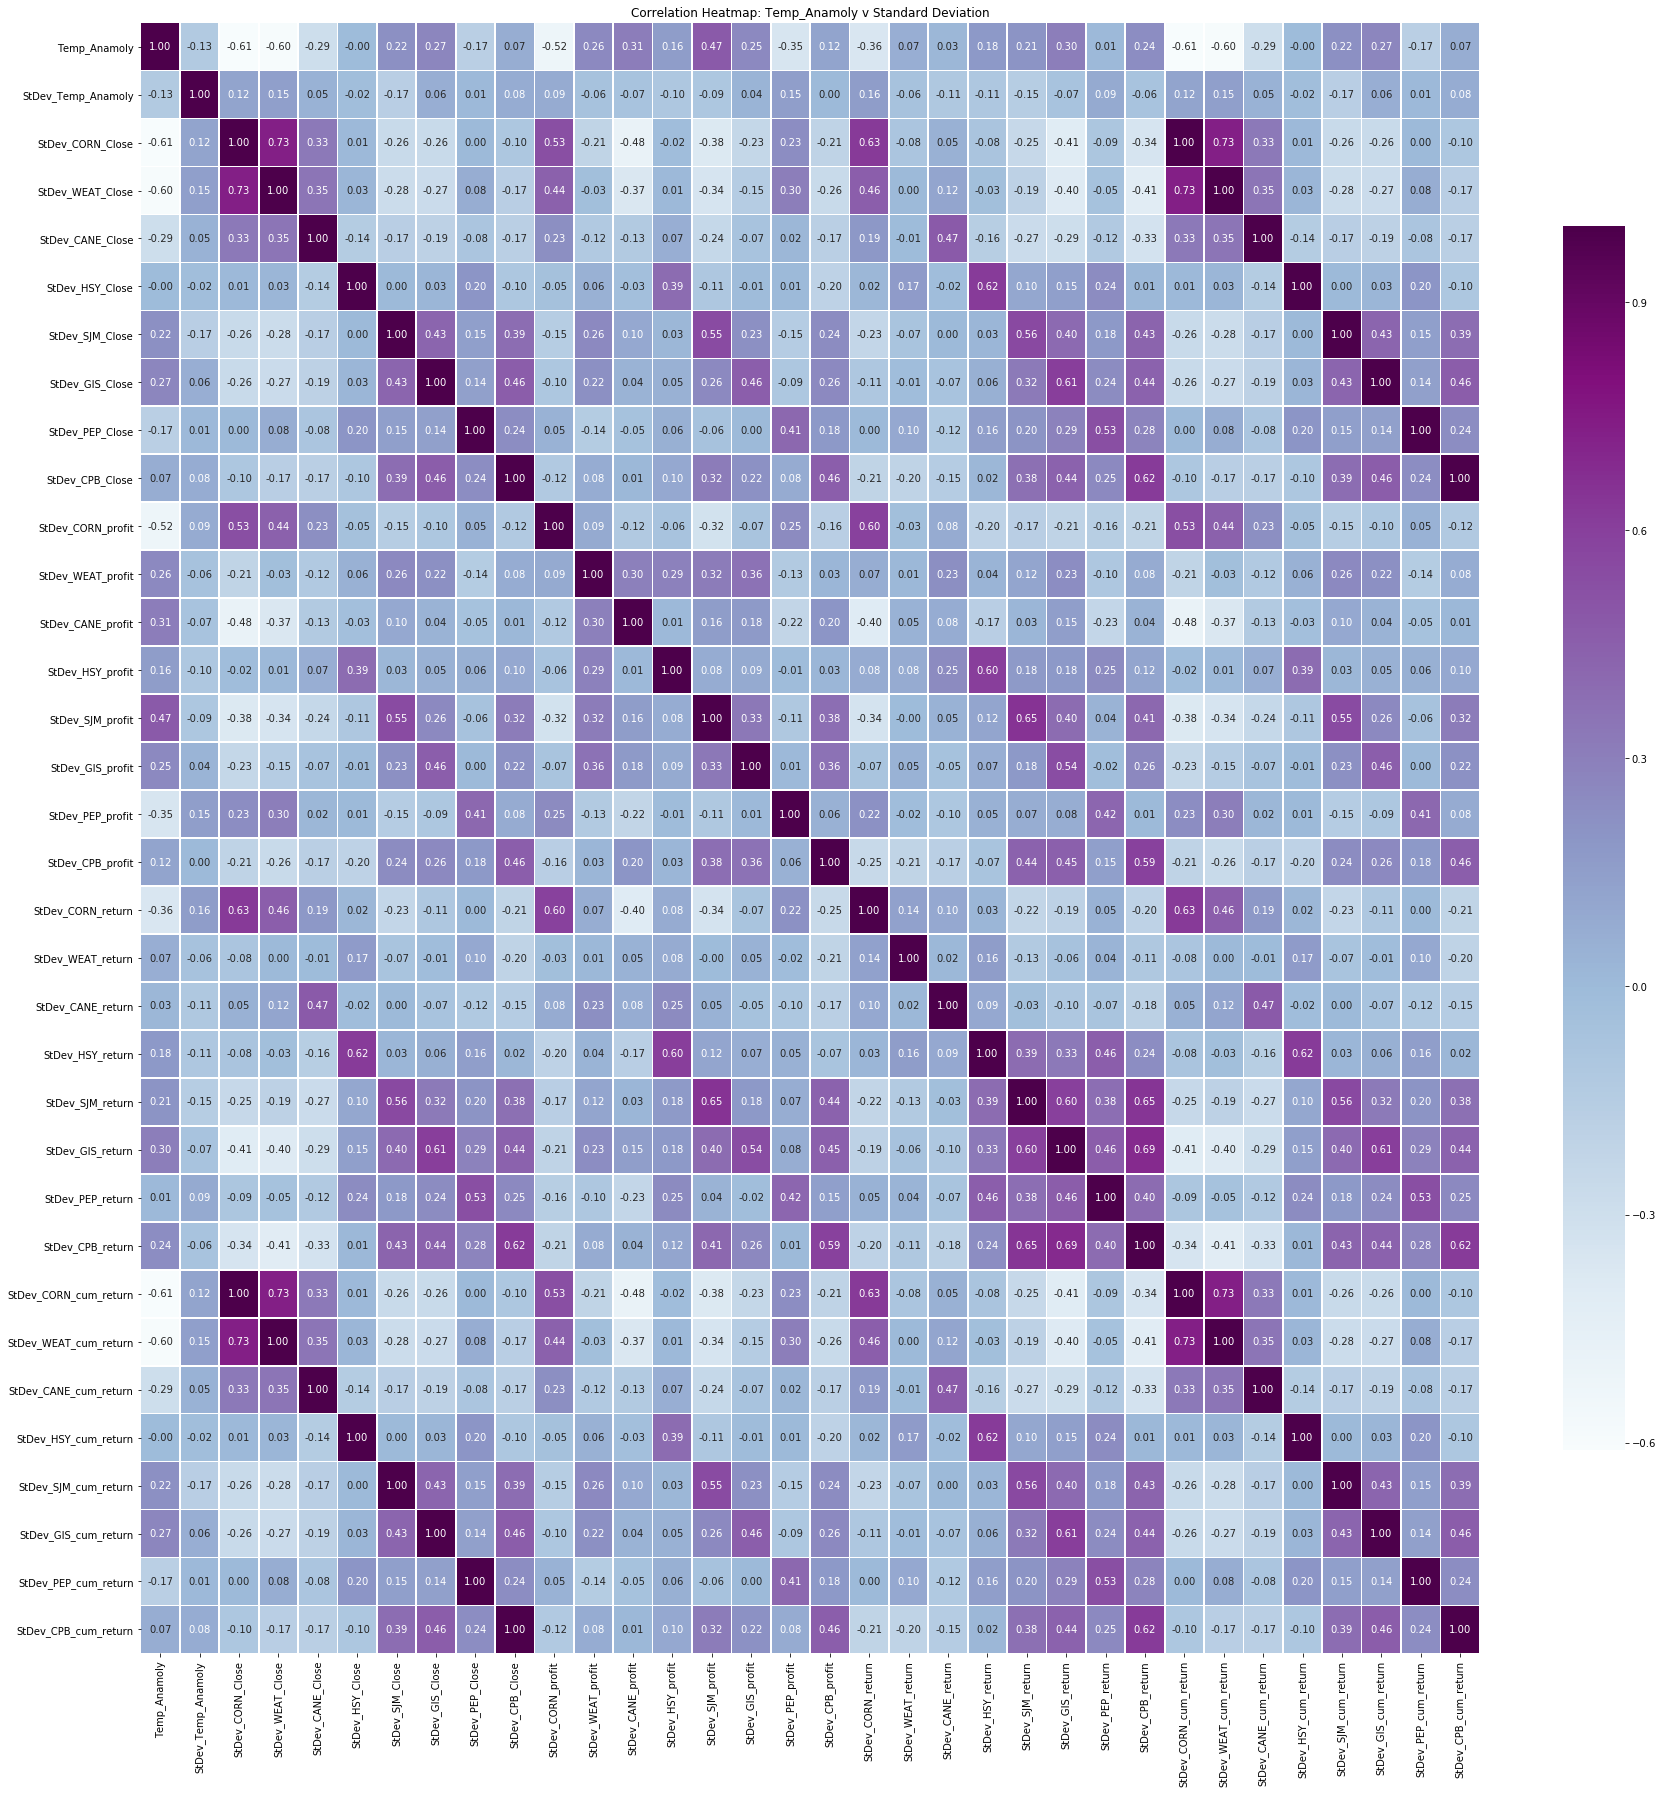

In [55]:
#see if there is a relationship with Temp_Anamoly via correlation, covariance, granger causality

#correlation between daily stock_Close and company stocks

stock_per_change = data_month[['Temp_Anamoly','StDev_Temp_Anamoly',
                        'StDev_CORN_Close','StDev_WEAT_Close','StDev_CANE_Close','StDev_HSY_Close','StDev_SJM_Close','StDev_GIS_Close', 'StDev_PEP_Close', 'StDev_CPB_Close',
                        'StDev_CORN_profit','StDev_WEAT_profit','StDev_CANE_profit','StDev_HSY_profit','StDev_SJM_profit','StDev_GIS_profit', 'StDev_PEP_profit', 'StDev_CPB_profit',
                        'StDev_CORN_return','StDev_WEAT_return','StDev_CANE_return','StDev_HSY_return','StDev_SJM_return','StDev_GIS_return', 'StDev_PEP_return', 'StDev_CPB_return',
                        'StDev_CORN_cum_return','StDev_WEAT_cum_return','StDev_CANE_cum_return','StDev_HSY_cum_return','StDev_SJM_cum_return','StDev_GIS_cum_return', 'StDev_PEP_cum_return', 'StDev_CPB_cum_return']]
plt.figure(figsize = (30,30))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Temp_Anamoly v Standard Deviation')

**Covariance**

In [56]:
#finding the covariance for Temp_Anamoly and standard deviation features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

temp = array(data_month['Temp_Anamoly'])

a_std = array(data_month['StDev_CORN_Close'])
b_std = array(data_month['StDev_WEAT_Close'])
c_std = array(data_month['StDev_CANE_Close'])
d_std = array(data_month['StDev_HSY_Close'])
e_std = array(data_month['StDev_SJM_Close'])
f_std = array(data_month['StDev_GIS_Close'])
g_std = array(data_month['StDev_PEP_Close'])
h_std = array(data_month['StDev_CPB_Close'])

i_std = array(data_month['StDev_CORN_profit'])
j_std = array(data_month['StDev_WEAT_profit'])
k_std = array(data_month['StDev_CANE_profit'])
l_std = array(data_month['StDev_HSY_profit'])
m_std = array(data_month['StDev_SJM_profit'])
n_std = array(data_month['StDev_GIS_profit'])
o_std = array(data_month['StDev_PEP_profit'])
p_std = array(data_month['StDev_CPB_profit'])

q_std = array(data_month['StDev_CORN_return'])
r_std = array(data_month['StDev_WEAT_return'])
s_std = array(data_month['StDev_CANE_return'])
t_std = array(data_month['StDev_HSY_return'])
u_std = array(data_month['StDev_SJM_return'])
v_std = array(data_month['StDev_GIS_return'])
w_std = array(data_month['StDev_PEP_return'])
x_std = array(data_month['StDev_CPB_return'])

y_std = array(data_month['StDev_CORN_cum_return'])
z_std = array(data_month['StDev_WEAT_cum_return'])
aa_std = array(data_month['StDev_CANE_cum_return'])
bb_std = array(data_month['StDev_HSY_cum_return'])
cc_std = array(data_month['StDev_SJM_cum_return'])
dd_std = array(data_month['StDev_GIS_cum_return'])
ee_std = array(data_month['StDev_PEP_cum_return'])
ff_std = array(data_month['StDev_CPB_cum_return'])

print('StDev_Close')
covariance1_std = cov(temp,a_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_Close',covariance1_std)
covariance2_std = cov(temp,b_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_Close',covariance2_std)
covariance3_std = cov(temp,c_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_Close',covariance3_std)
covariance4_std = cov(temp,d_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_Close',covariance4_std)
covariance5_std = cov(temp,e_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_Close',covariance5_std)
covariance6_std = cov(temp,f_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_Close',covariance6_std)
covariance7_std = cov(temp,g_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_Close',covariance7_std)
covariance8_std = cov(temp,h_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_Close',covariance8_std)

print('StDev_profit')
covariance9_std = cov(temp,i_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_profit',covariance9_std)
covariance10_std = cov(temp,j_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_profit',covariance10_std)
covariance11_std = cov(temp,k_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_profit',covariance11_std)
covariance12_std = cov(temp,l_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_profit',covariance12_std)
covariance13_std = cov(temp,m_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_profit',covariance13_std)
covariance14_std = cov(temp,n_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_profit',covariance14_std)
covariance15_std = cov(temp,o_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_profit',covariance15_std)
covariance16_std = cov(temp,p_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_profit',covariance16_std)

print('StDev_return')
covariance17_std = cov(temp,q_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_return',covariance17_std)
covariance18_std = cov(temp,r_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_return',covariance18_std)
covariance19_std = cov(temp,s_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_return',covariance19_std)
covariance20_std = cov(temp,t_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_return',covariance20_std)
covariance21_std = cov(temp,u_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_return',covariance21_std)
covariance22_std = cov(temp,v_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_return',covariance22_std)
covariance23_std = cov(temp,w_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_return',covariance23_std)
covariance24_std = cov(temp,x_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_return',covariance24_std)

print('StDev_return')
covariance25_std = cov(temp,y_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_cum_return',covariance25_std)
covariance26_std = cov(temp,z_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_cum_return',covariance26_std)
covariance27_std = cov(temp,aa_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_cum_return',covariance27_std)
covariance28_std = cov(temp,bb_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_cum_return',covariance28_std)
covariance29_std = cov(temp,cc_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_cum_return',covariance29_std)
covariance30_std = cov(temp,dd_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_cum_return',covariance30_std)
covariance31_std = cov(temp,ee_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_cum_return',covariance31_std)
covariance32_std = cov(temp,ff_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_cum_return',covariance32_std)

StDev_Close
Covariance of Temp_Anamoly and StDev_CORN_Close -0.03842536885651164
Covariance of Temp_Anamoly and StDev_WEAT_Close -0.015824983639175946
Covariance of Temp_Anamoly and StDev_CANE_Close -0.006798444922639166
Covariance of Temp_Anamoly and StDev_HSY_Close -3.5908611778681434e-06
Covariance of Temp_Anamoly and StDev_SJM_Close 0.0338996638768959
Covariance of Temp_Anamoly and StDev_GIS_Close 0.021091044125854993
Covariance of Temp_Anamoly and StDev_PEP_Close -8.790595336307821e-06
Covariance of Temp_Anamoly and StDev_CPB_Close 0.00012008408952983453
StDev_profit
Covariance of Temp_Anamoly and StDev_CORN_profit -89924.59782109567
Covariance of Temp_Anamoly and StDev_WEAT_profit 345.3615180663869
Covariance of Temp_Anamoly and StDev_CANE_profit 7408.050373393378
Covariance of Temp_Anamoly and StDev_HSY_profit 959.9827226407311
Covariance of Temp_Anamoly and StDev_SJM_profit 1811124.773626042
Covariance of Temp_Anamoly and StDev_GIS_profit 1579813.3229406134
Covariance of Temp_A

**Granger Causality**

In [57]:
#evaluation if the standard deviation (volatility) is caused by Temp_Anamoly through Granger Causality
#answer is acept null unless otherwise stated

#null hyp: StDev_Stock_Close is not Granger caused by Temp_Anamoly
print('StDev_CORN_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_Close']], maxlag=4))
print('StDev_WEAT_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_Close']], maxlag=4)) 
print('StDev_CANE_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_Close']], maxlag=4)) 
print('StDev_HSY_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_Close']], maxlag=4)) 
print('StDev_SJM_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_Close']], maxlag=4)) 
print('StDev_GIS_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_Close']], maxlag=4)) 
print('StDev_PEP_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_Close']], maxlag=4)) 
print('StDev_CPB_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_Close']], maxlag=4)) 

#null hyp: StDev_Stock_profit is not Granger caused by Temp_Anamoly
print('StDev_CORN_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_profit']], maxlag=4)) 
print('StDev_WEAT_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_profit']], maxlag=4)) 
print('StDev_CANE_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_profit']], maxlag=4)) 
print('StDev_HSY_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_profit']], maxlag=4)) 
print('StDev_SJM_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_profit']], maxlag=4)) #reject
print('StDev_GIS_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_profit']], maxlag=4)) 
print('StDev_PEP_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_profit']], maxlag=4)) 
print('StDev_CPB_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_profit']], maxlag=4)) 

#null hyp: StDev_Stock_return is not Granger caused by Temp_Anamoly
print('StDev_CORN_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_return']], maxlag=4)) 
print('StDev_WEAT_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_return']], maxlag=4)) 
print('StDev_CANE_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_return']], maxlag=4)) 
print('StDev_HSY_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_return']], maxlag=4)) 
print('StDev_SJM_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_return']], maxlag=4)) 
print('StDev_GIS_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_return']], maxlag=4)) 
print('StDev_PEP_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_return']], maxlag=4)) #reject
print('StDev_CPB_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_return']], maxlag=4)) 

#null hyp: StDev_Stock_cum_return is not Granger caused by Temp_Anamoly
print('StDev_CORN_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_cum_return']], maxlag=4)) 
print('StDev_WEAT_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_cum_return']], maxlag=4)) 
print('StDev_CANE_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_cum_return']], maxlag=4)) 
print('StDev_HSY_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_cum_return']], maxlag=4)) 
print('StDev_SJM_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_cum_return']], maxlag=4)) 
print('StDev_GIS_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_cum_return']], maxlag=4)) 
print('StDev_PEP_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_cum_return']], maxlag=4)) 
print('StDev_CPB_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_cum_return']], maxlag=4)) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3765  , p=0.0694  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=3.4866  , p=0.0619  , df=1
likelihood ratio test: chi2=3.4241  , p=0.0643  , df=1
parameter F test:         F=3.3765  , p=0.0694  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7289  , p=0.1834  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=3.6521  , p=0.1610  , df=2
likelihood ratio test: chi2=3.5830  , p=0.1667  , df=2
parameter F test:         F=1.7289  , p=0.1834  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1569  , p=0.3310  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=3.7531  , p=0.2894  , df=3
likelihood ratio test: chi2=3.6793  , p=0.2982  , df=3
parameter F test:         F=1.1569  , p=0.3310  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1253  , p=0.3502  , df_d

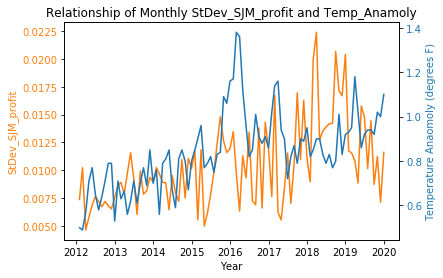

In [58]:
#plotting monthly temp anomoly and standard deviation---inverse relationship
##https://matplotlib.org/gallery/api/two_scales.html

#Graph1
fig, ax1 = plt.subplots()
ax1.set_title('Relationship of Monthly StDev_SJM_profit and Temp_Anamoly')

color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('StDev_SJM_profit', color=color)
ax1.plot(data_month['StDev_GIS_return'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature Anaomoly (degrees F)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_month['Temp_Anamoly'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
